In [1]:
# Import Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import os

In [2]:
# Create a dir. to store project's figures
PROJECT_ROOT_DIR = "."
PROJECT_NAME = "CarDekho"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "figures", PROJECT_NAME)
os.makedirs(IMAGES_PATH, exist_ok=True)

# Creating a function to save generated figures in the above dir.
def save_fig(fig_id, tight_layout = True, fig_extension = "png", resolution = 300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format = fig_extension, dpi = resolution)
    print("Figure saved")

In [3]:
# Read the CSV file
df = pd.read_csv("D:\\DataSc\\Datasets\\carDekho_car.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
# Used Car prediction

# Dataset: Kaggle data set on used car prices by CarDekho.com (Dataset is avaiable in the project's github dir.)

# Before exploring further let's try to understand the data first and what we want to do with it!
# Features present:
#          name: Name of the model along with manufacturing company's name
#          year: The year the model was released!
#          selling price: The current selling price of the car
#          km_driven: Total distance driven in the car
#          fuel: Type of car(petrol/diesel/etc.)
#          seller_type: The car is sold by a person or by a dealer
#          transmission: automatic or manual transmission
#          owner: no. of person that has owned the car
#          mileage: a number of miles travelled or covered in kmpl
#          engine: the capacity of the engine or piston chambers in cubic centimeter
#          max_power: Horsepower of the car!
#          torque: 
#          seats: no. of seats in the car model

In [5]:
# Now that we have defined our dataset, let's make a plan what to do with it!
# Our goal would be observe and explore the price of car models based on the given features!
# Understand which factors affect most on the price of a car.
# And finally try to build a linear model to predict car prices!

In [6]:
# Let's get some info on the dataset
print(df.info())
print("\n Dataset size:   ", df.shape)

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB
None

 Dataset size:    (8128, 13)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [7]:
# Our dataset is not perfect! We have to manipulate the dataset to make it fit!
# Notice that the fuel, seller_type, transmission, and owner columns are categorical features!
# While mileage, engine, max_power, and max_power are defined as object type!
# We will have to convert the above objects into float or int type by removing the SI-units(as strings)!

In [8]:
# Checking Categorical data
for col in df[['fuel', 'seller_type', 'transmission', 'owner']]:
    print(df[[col]].value_counts(), "\n")
    
# We will use Scikit learn lib. to convert these categorical values into numerical values, that way our machine could interpret them!

fuel  
Diesel    4402
Petrol    3631
CNG         57
LPG         38
dtype: int64 

seller_type     
Individual          6766
Dealer              1126
Trustmark Dealer     236
dtype: int64 

transmission
Manual          7078
Automatic       1050
dtype: int64 

owner               
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
dtype: int64 



In [9]:
# Let's clean our dataset first! A good Dataset can help us make better models and insights!
# Check of duplicates in the dataset!
duplicateRows = df[df.duplicated()]
duplicateRows

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
291,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
296,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
370,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
371,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
372,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7987,Renault Captur 1.5 Diesel RXT,2018,1265000,12000,Diesel,Individual,Manual,First Owner,20.37 kmpl,1461 CC,108.45 bhp,240Nm@ 1750rpm,5.0
7988,Maruti Ciaz Alpha Diesel,2019,1025000,32000,Diesel,Individual,Manual,First Owner,28.09 kmpl,1248 CC,88.50 bhp,200Nm@ 1750rpm,5.0
8117,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [10]:
# Dropping the duplicates, but keeping the last instance of the duplicated data!
df_new = df.drop_duplicates(keep='last')
print(df_new.shape[0])

6926


In [11]:
df_new.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,219.7Nm@ 1500-2750rpm,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [12]:
# Now, let's look for null values in our data sets!
print(df_new.isna().sum())
print("\n")
print(df_new.isna().sum()*100/df_new.shape[0])

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          208
engine           208
max_power        205
torque           209
seats            208
dtype: int64


name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          3.003176
engine           3.003176
max_power        2.959861
torque           3.017615
seats            3.003176
dtype: float64


In [13]:
# About ~2-3% of the data in mileage, engine, max_power, torque, and seats are missings from the data!
# Let's drop these NaNs and check our dataset(I'm preffering to drop the value as they account for <5% of the data!)
df_new_drop = df_new.dropna()

# disable chained assignments so we dont get attribute warnings!
pd.options.mode.chained_assignment = None

print(df_new_drop.isna().sum()*100/df_new_drop.shape[0])

name             0.0
year             0.0
selling_price    0.0
km_driven        0.0
fuel             0.0
seller_type      0.0
transmission     0.0
owner            0.0
mileage          0.0
engine           0.0
max_power        0.0
torque           0.0
seats            0.0
dtype: float64


In [14]:
# Nulls have been taken care of! But before we go further, let's compare the datasets and their sizes!
print('Original dataset size:                    ', df.shape)
print('Dataset size after dropping duplicates:   ', df_new.shape)
print('Dataset size after dropping NaNs:         ', df_new_drop.shape)
print('Loss is data(in %) from original:         ', ((df.shape[0]-df_new_drop.shape[0])/df.shape[0])*100)

Original dataset size:                     (8128, 13)
Dataset size after dropping duplicates:    (6926, 13)
Dataset size after dropping NaNs:          (6717, 13)
Loss is data(in %) from original:          17.35974409448819


In [15]:
# 17.4% of the data has been removed or dropped from the original dataset!
# We still have a lot of data to work with! But as general rule of thumb: MORE DATA means BETTER MODELS!
# let's look at our new dataset first!
df_new_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6717 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   object 
 5   seller_type    6717 non-null   object 
 6   transmission   6717 non-null   object 
 7   owner          6717 non-null   object 
 8   mileage        6717 non-null   object 
 9   engine         6717 non-null   object 
 10  max_power      6717 non-null   object 
 11  torque         6717 non-null   object 
 12  seats          6717 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 734.7+ KB


In [16]:
df_new_drop.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [17]:
df_new_drop.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,219.7Nm@ 1500-2750rpm,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [18]:
# Ok, so we need to reset of index! We also need to modify the mileage, engine, and max_power columns!
# Let's change our column data first!

# Dropping the SI-units in the 'mileage', 'engine', 'max_power'!
df_new_drop['mileage'] = df_new_drop['mileage'].replace({'kmpl': '*1', 'km/kg':'*1'}, regex = True).map(pd.eval).astype(float)
df_new_drop['engine'] = df_new_drop['engine'].replace({'CC': '*1'}, regex = True).map(pd.eval).astype(int)
df_new_drop['max_power'] = df_new_drop['max_power'].replace({'bhp': '*1'}, regex = True).map(pd.eval).astype(float)

df_new_drop.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5.0


In [19]:
df_new_drop.tail(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.0,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248,73.9,190Nm@ 2000rpm,5.0
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70.0,140Nm@ 1800-3000rpm,5.0


In [20]:
print(df_new_drop.shape)
# We have converted or selected features, now let's reset our index!
# Notice how the index is 8127, when we only have 6717 entries!
df_new_drop = df_new_drop.reset_index()
df_new_drop

(6717, 13)


,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5.0
1,1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0
2,2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5.0
4,4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6712,8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396,88.73,219.7Nm@ 1500-2750rpm,5.0
6713,8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,113.7Nm@ 4000rpm,5.0
6714,8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0
6715,8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248,73.90,190Nm@ 2000rpm,5.0


In [21]:
# Since we already have the max_power of the car. I will drop the torque feature! As I have failed to convert it into numerical data!
# Also, drop the 'index' column, and make a new column 'company' to store the car model's company!

# Dropping the index and torque columns
df_clean = df_new_drop.drop(['index', 'torque'], axis=1)

# Creating a new column 'company'
df_clean['company'] = df_clean['name'].str.split().str[0]

df_clean.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,company
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0,Maruti


In [22]:
df_clean.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,company
6712,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396,88.73,5.0,Hyundai
6713,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5.0,Hyundai
6714,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5.0,Hyundai
6715,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248,73.90,5.0,Maruti
6716,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70.00,5.0,Tata


In [23]:
df_clean.shape

(6717, 13)

In [24]:
df_clean.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
company          0
dtype: int64

In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6717 entries, 0 to 6716
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   object 
 5   seller_type    6717 non-null   object 
 6   transmission   6717 non-null   object 
 7   owner          6717 non-null   object 
 8   mileage        6717 non-null   float64
 9   engine         6717 non-null   int32  
 10  max_power      6717 non-null   float64
 11  seats          6717 non-null   float64
 12  company        6717 non-null   object 
dtypes: float64(3), int32(1), int64(3), object(6)
memory usage: 656.1+ KB


In [26]:
# We have converted our SI-units data into ints and floats!
# We have cleaned the dataset by removing duplicate values and NaNs!
# We have also reset our index to match with the dataset length!
# Let's move on to EDA

In [27]:
# Strat EDA
df_clean.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,6717.000000,6.717000e+03,6.717000e+03,6717.000000,6717.000000,6717.000000,6717.000000
mean,2013.611136,5.263860e+05,7.339834e+04,19.466585,1430.985857,87.766100,5.434271
std,3.897402,5.235504e+05,5.870328e+04,4.048102,493.469198,31.724555,0.983805
min,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,2.000000
25%,2011.000000,2.500000e+05,3.800000e+04,16.800000,1197.000000,67.100000,5.000000
50%,2014.000000,4.200000e+05,6.820300e+04,19.440000,1248.000000,81.830000,5.000000
75%,2017.000000,6.500000e+05,1.000000e+05,22.500000,1498.000000,100.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [28]:
# import seaborn for data viz.
import seaborn as sns

Figure saved


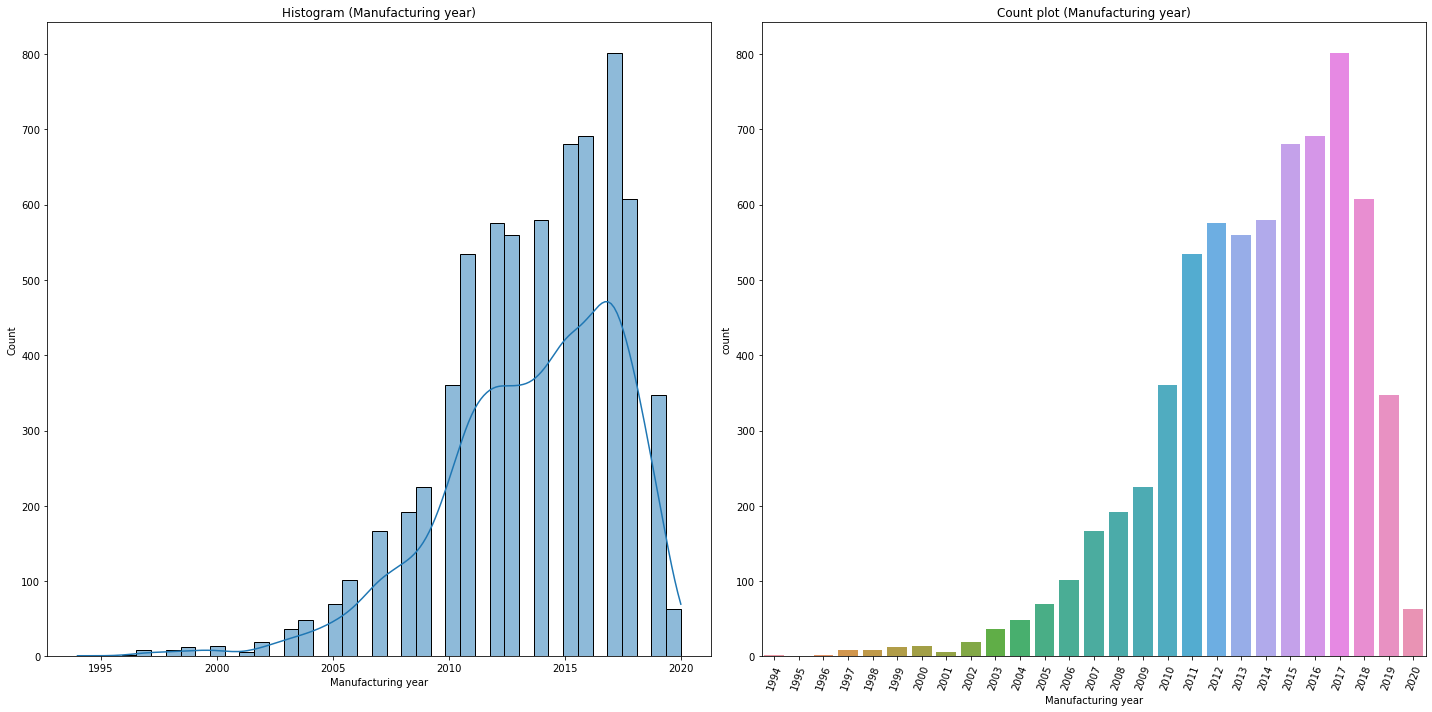

<Figure size 432x288 with 0 Axes>

In [29]:
# So, before we process our dataset for our ML algo., we should try to explore our dataset as much as possible and try to make certain assumptions-
#-or see how to much our dataset reflects the real-world scenario!

# Let's start with year! 
%matplotlib inline
figure, axes = plt.subplots(1, 2, figsize=(20, 10))

sns.histplot(data=df_clean["year"], kde=True, ax=axes[0]).set(xlabel = "Manufacturing year", title='Histogram (Manufacturing year)')
sns.countplot(x ='year', data = df_clean, ax=axes[1]).set(xlabel = "Manufacturing year", title='Count plot (Manufacturing year)')
plt.xticks(rotation=70)

save_fig("Hist and Count plot by years")
plt.show()
plt.tight_layout()

In [30]:
# From the above plots, we can see that most of the car models present in the datasets are manufactured between 2010-2018!
# With ~800 car models manufactured in 2017!

Figure saved


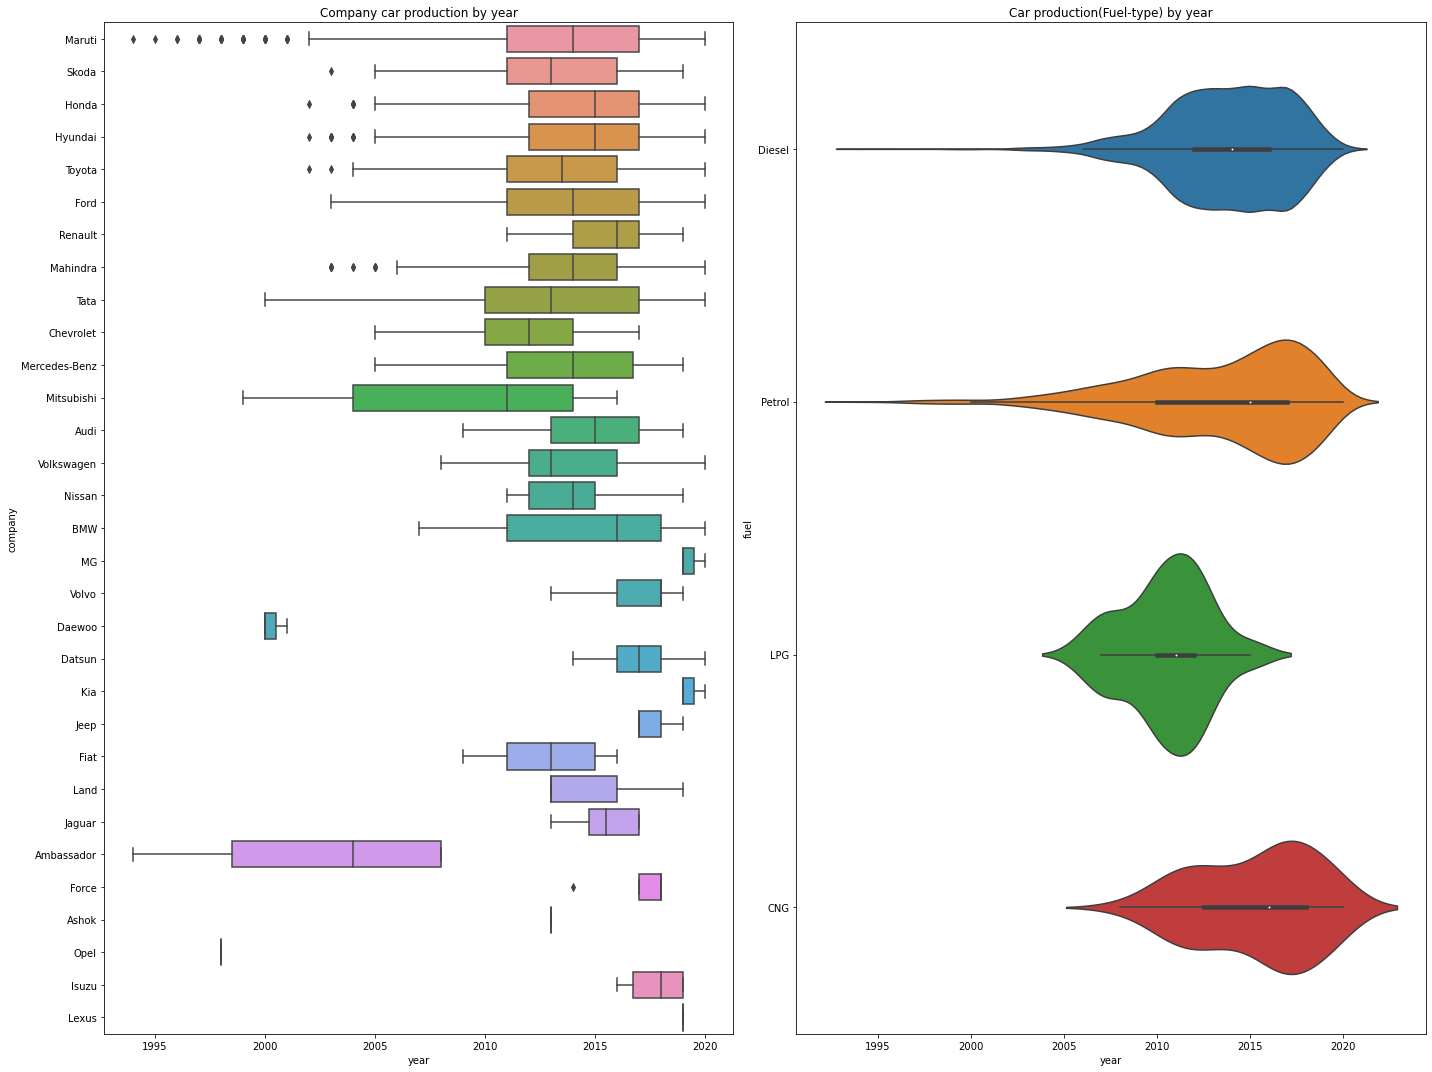

<Figure size 432x288 with 0 Axes>

In [31]:
%matplotlib inline
figure, axes = plt.subplots(1, 2, figsize=(20, 15))

sns.boxplot(x='year', y="company", data=df_clean, ax=axes[0]).set(title='Company car production by year')
sns.violinplot(x='year', y="fuel", data=df_clean, ax=axes[1]).set(title='Car production(Fuel-type) by year')

save_fig("Car companies and fuel type by the years")
plt.show()
plt.tight_layout()

In [32]:
# Looking at the above graphs, we can get interesting insights such as:

#        LPG cars were a thing between 2005-2015, a lot of LPG car models were manufactured during this time, and during the 2010s- more LPG cars were released than any other fuel-type!
#        Production of CNG cars took an increase after the year of 2015!
#        Diesel cars have been in constant production and seems to be growing!
#        Petrol car production has also increased after the year 2010!

#        Foreign Motor companies like BMW, LEXUS, Kia, Audi, Renault, MG, Isuzu, Jeep, etc. have been releasing more cars recently compared
#-to the previous decades!

#        Indian companies like Maruti and Tata have been consistent with yheir car production through out the years!
#        Our beloved Ambassador company have stopped its car production after 2010s!

# The dataset reflects the real-world! With Maruti, Tata, Honda, Skoda, etc. dominating the Indian roads!

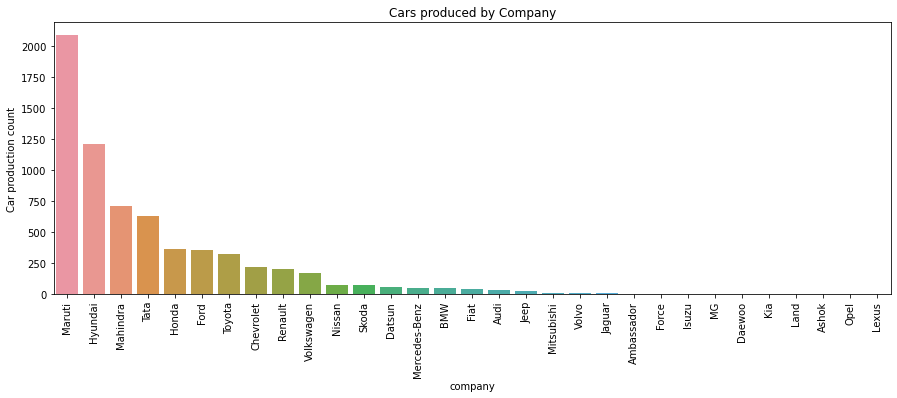

<Figure size 432x288 with 0 Axes>

In [33]:
%matplotlib inline
figure, axes = plt.subplots( figsize=(15, 5))

sns.countplot(x="company", data=df_clean, order = df_clean['company'].value_counts().index).set(title='Cars produced by Company')
plt.xticks(rotation=90)
plt.ylabel("Car production count")

plt.show()
plt.tight_layout()

In [34]:
# Our dataset has car models manufactured by Maruti followed by Hyundai, Mahindra, and Tata the most!
# Let's see car models manufactured based on most and least populous companies in the dataset!

Figure saved


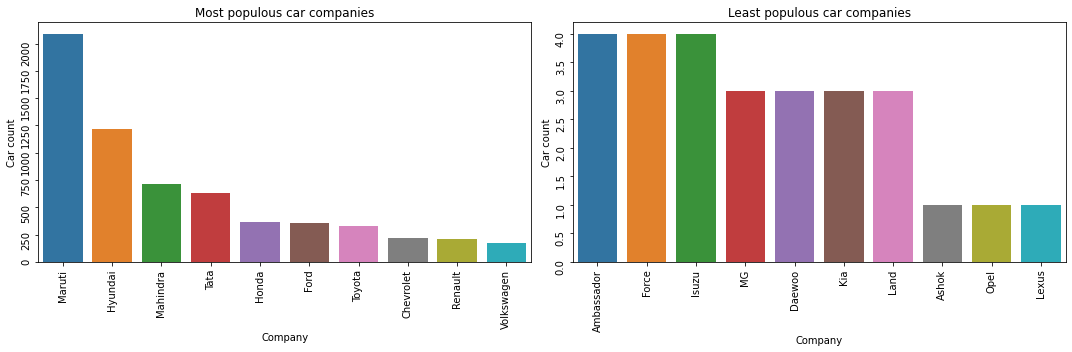

<Figure size 432x288 with 0 Axes>

In [35]:
figure, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(x="company", data=df_clean, ax=axes[0], order = df_clean['company'].value_counts().iloc[:10].index).set(title='Most populous car companies')
sns.countplot(x="company", data=df_clean, ax=axes[1], order = df_clean['company'].value_counts().iloc[-10:].index).set(title='Least populous car companies')

for subplot in axes:
    subplot.set_ylabel("Car count")
    subplot.set_xlabel("Company")
    subplot.tick_params(rotation=90)
    
# Save the figure
save_fig('Most and Least populous car companies')

plt.show()
plt.tight_layout()

Figure saved


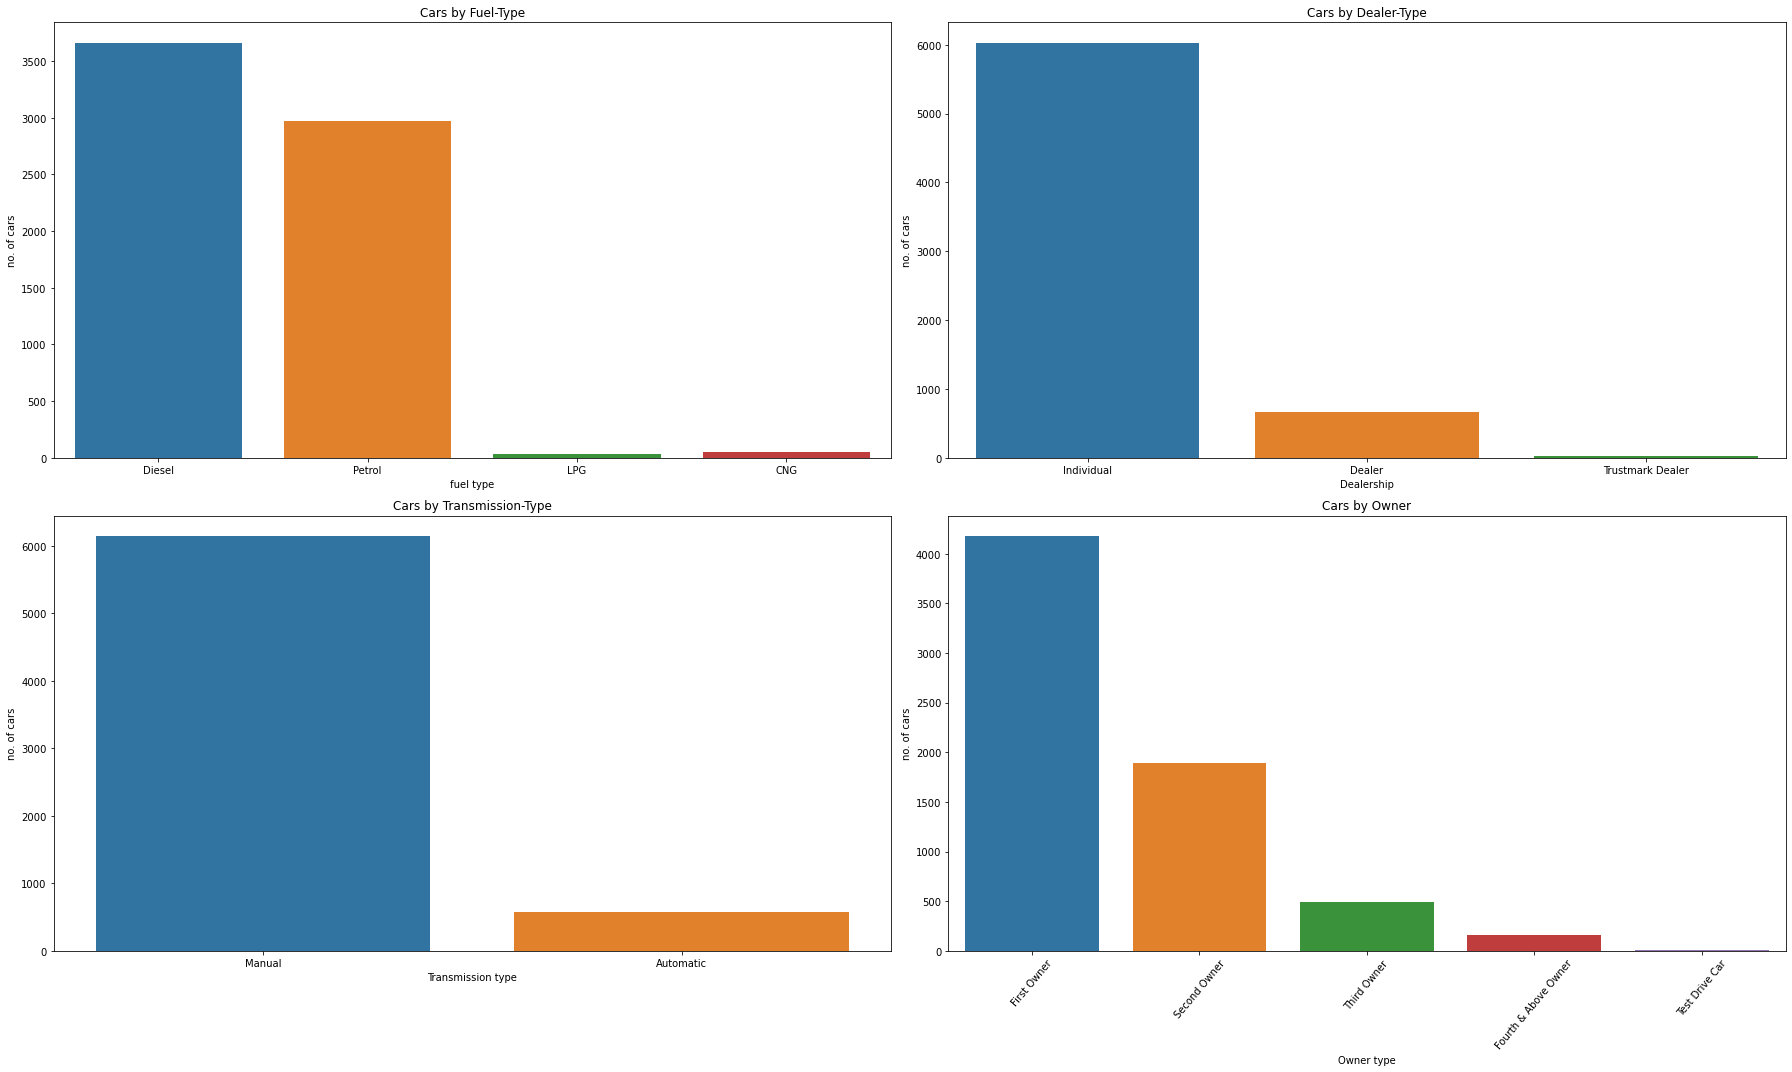

<Figure size 432x288 with 0 Axes>

In [36]:
%matplotlib inline
figure, ax = plt.subplots(2, 2, figsize=(25, 15))

sns.countplot(x ='fuel', data = df_clean, ax=ax[0, 0]).set(title="Cars by Fuel-Type", xlabel="fuel type", ylabel="no. of cars")
sns.countplot(x ='seller_type', data = df_clean, ax=ax[0, 1]).set(title="Cars by Dealer-Type", xlabel="Dealership", ylabel="no. of cars")
sns.countplot(x ='transmission', data = df_clean, ax=ax[1, 0]).set(title="Cars by Transmission-Type", xlabel="Transmission type", ylabel="no. of cars")
sns.countplot(x ='owner', data = df_clean, ax=ax[1, 1]).set(title="Cars by Owner", xlabel="Owner type", ylabel="no. of cars")
plt.xticks(rotation=50)

# Save the figure
save_fig('Car count based on categorical features')

plt.show()
plt.tight_layout()

Figure saved


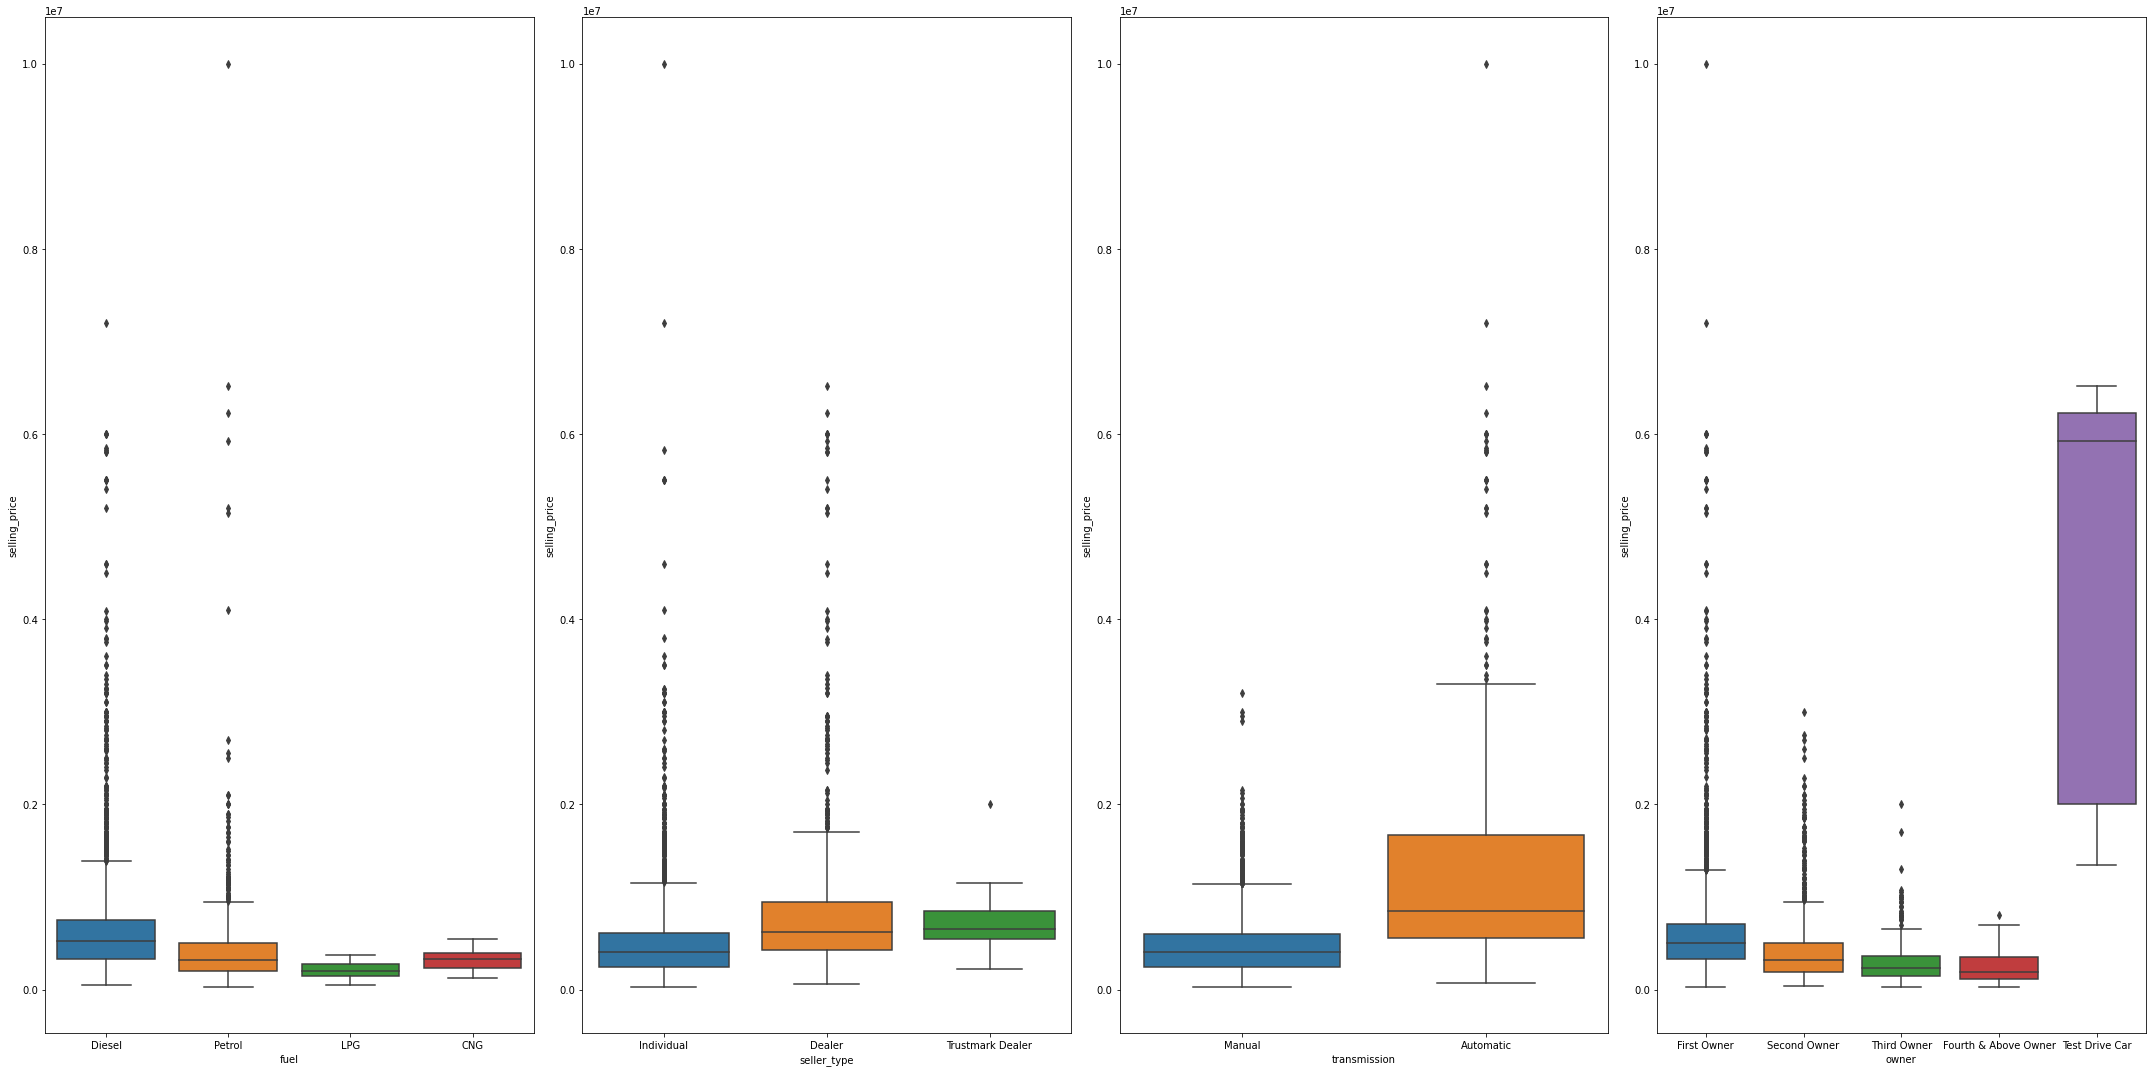

<Figure size 432x288 with 0 Axes>

In [37]:
# Let's Boxplot our categorical features with the numerical features! 
figure, ax = plt.subplots(1,4, figsize=(30, 15))

sns.boxplot(x='fuel', y="selling_price", ax=ax[0], data=df_clean)
sns.boxplot(x='seller_type', y="selling_price", ax=ax[1], data=df_clean)
sns.boxplot(x='transmission', y="selling_price", ax=ax[2], data=df_clean)
sns.boxplot(x='owner', y="selling_price", ax=ax[3], data=df_clean)

save_fig('Selling price vs categorical features')

plt.show()
plt.tight_layout()

Figure saved


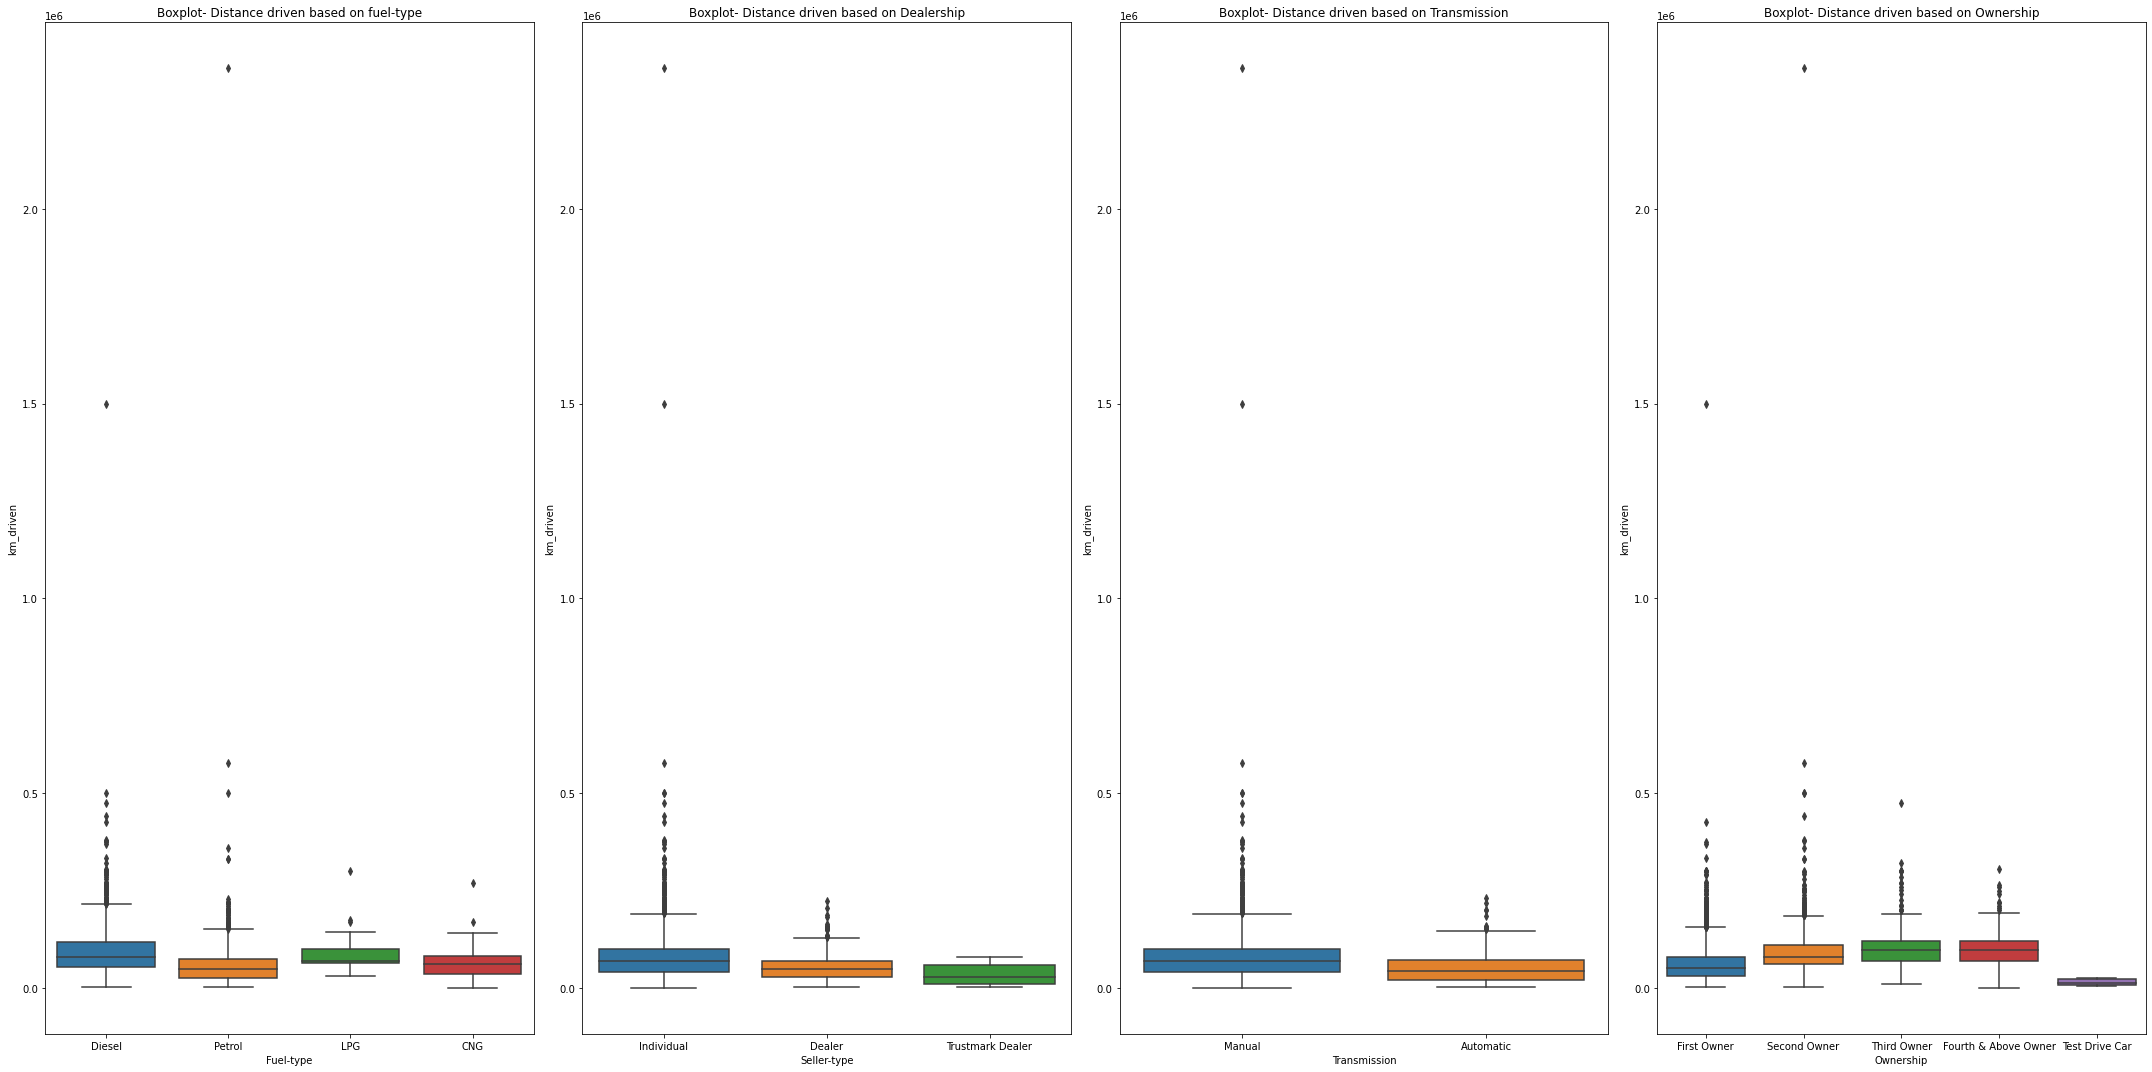

<Figure size 432x288 with 0 Axes>

In [38]:
# Let's Boxplot our categorical features with the numerical features! 
figure, ax = plt.subplots(1,4, figsize=(30, 15))

sns.boxplot(x='fuel', y="km_driven", ax=ax[0], data=df_clean).set(title='Boxplot- Distance driven based on fuel-type', xlabel='Fuel-type')
sns.boxplot(x='seller_type', y="km_driven", ax=ax[1], data=df_clean).set(title='Boxplot- Distance driven based on Dealership', xlabel='Seller-type')
sns.boxplot(x='transmission', y="km_driven", ax=ax[2], data=df_clean).set(title='Boxplot- Distance driven based on Transmission', xlabel='Transmission')
sns.boxplot(x='owner', y="km_driven", ax=ax[3], data=df_clean).set(title='Boxplot- Distance driven based on Ownership', xlabel='Ownership')

save_fig('Distance driven vs categorical features')

plt.show()
plt.tight_layout()

Figure saved


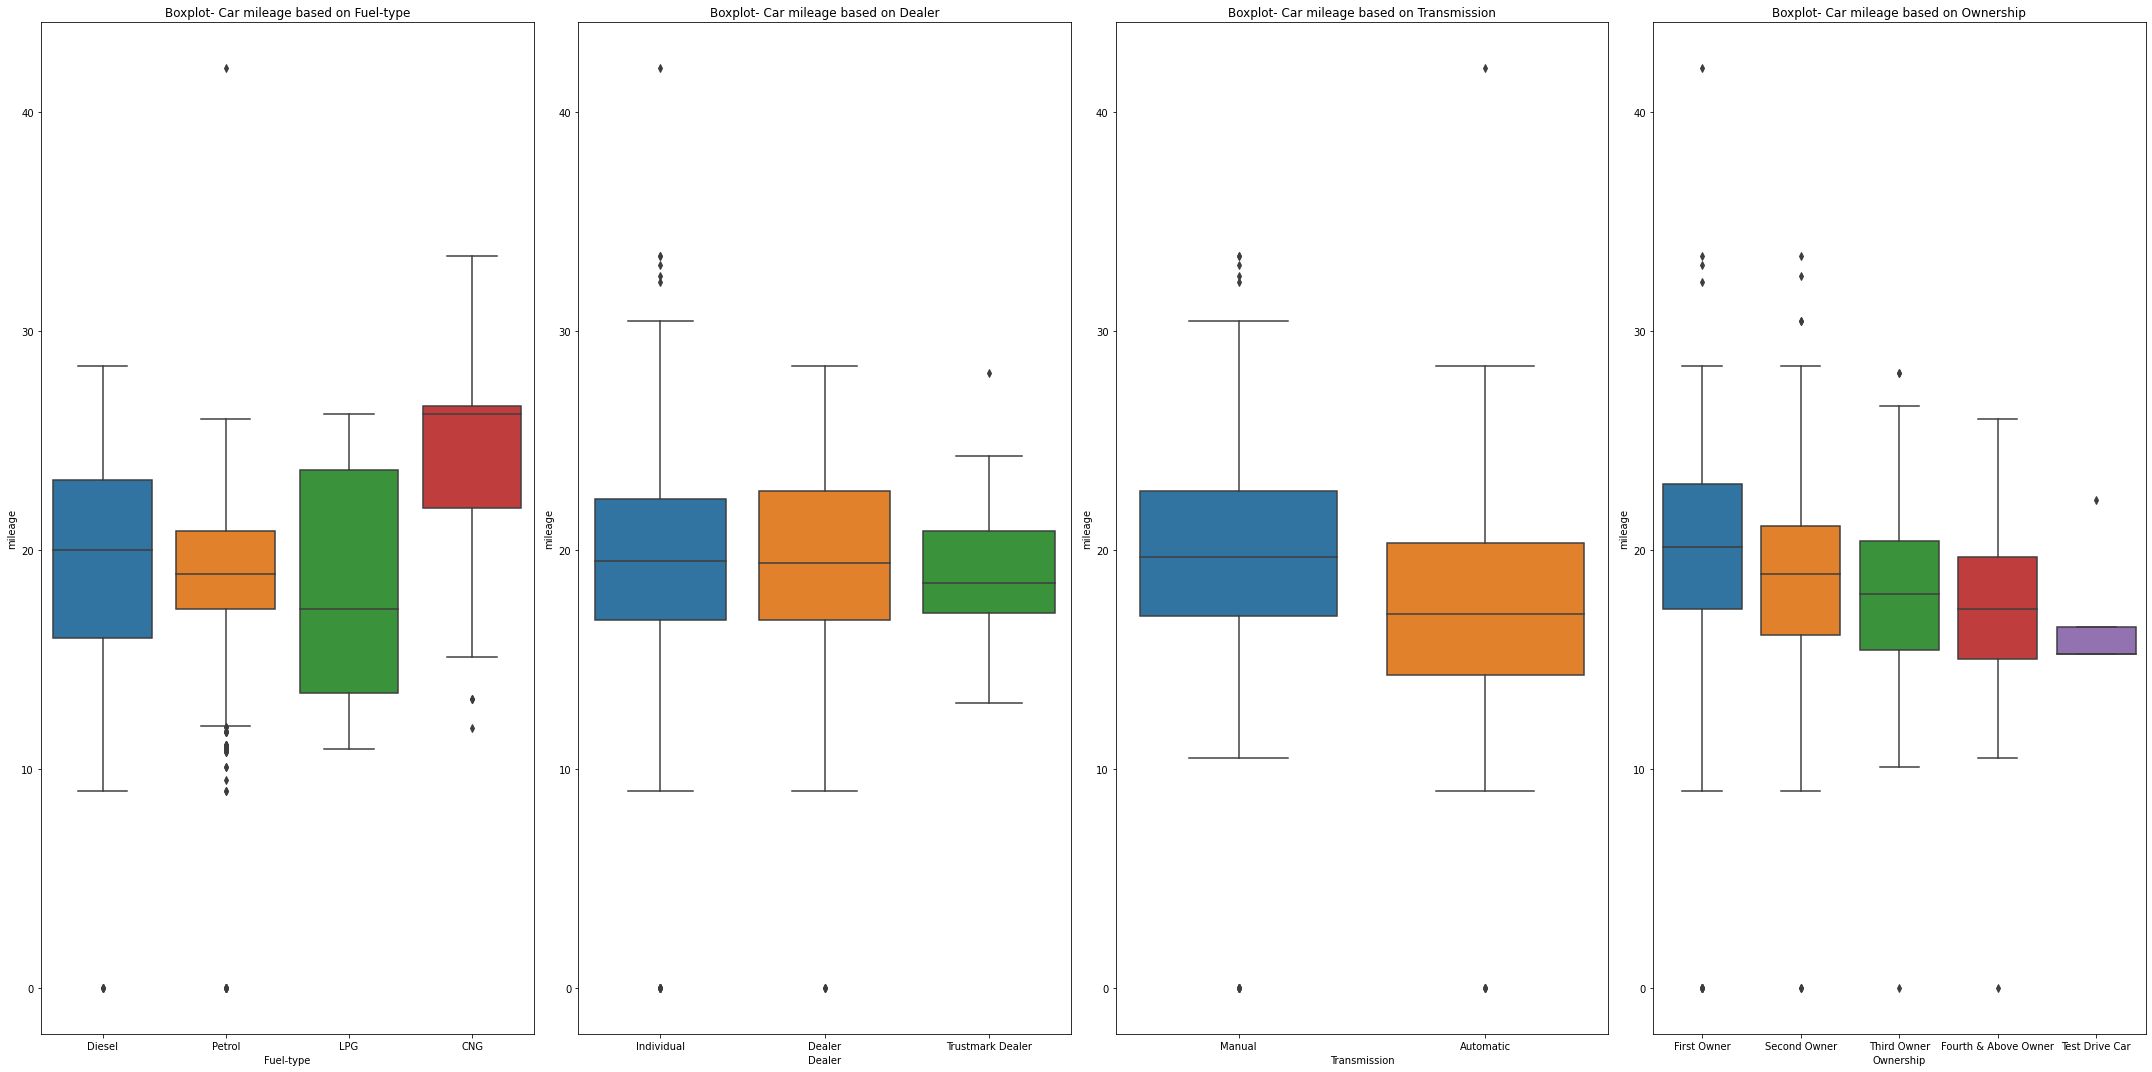

<Figure size 432x288 with 0 Axes>

In [39]:
# Let's Boxplot our categorical features with the numerical features! 
figure, ax = plt.subplots(1,4, figsize=(30, 15))

sns.boxplot(x='fuel', y="mileage", ax=ax[0], data=df_clean).set(title='Boxplot- Car mileage based on Fuel-type', xlabel='Fuel-type')
sns.boxplot(x='seller_type', y="mileage", ax=ax[1], data=df_clean).set(title='Boxplot- Car mileage based on Dealer', xlabel='Dealer')
sns.boxplot(x='transmission', y="mileage", ax=ax[2], data=df_clean).set(title='Boxplot- Car mileage based on Transmission', xlabel='Transmission')
sns.boxplot(x='owner', y="mileage", ax=ax[3], data=df_clean).set(title='Boxplot- Car mileage based on Ownership', xlabel='Ownership')

save_fig('Car mileage vs categorical features')

plt.show()
plt.tight_layout()

Figure saved


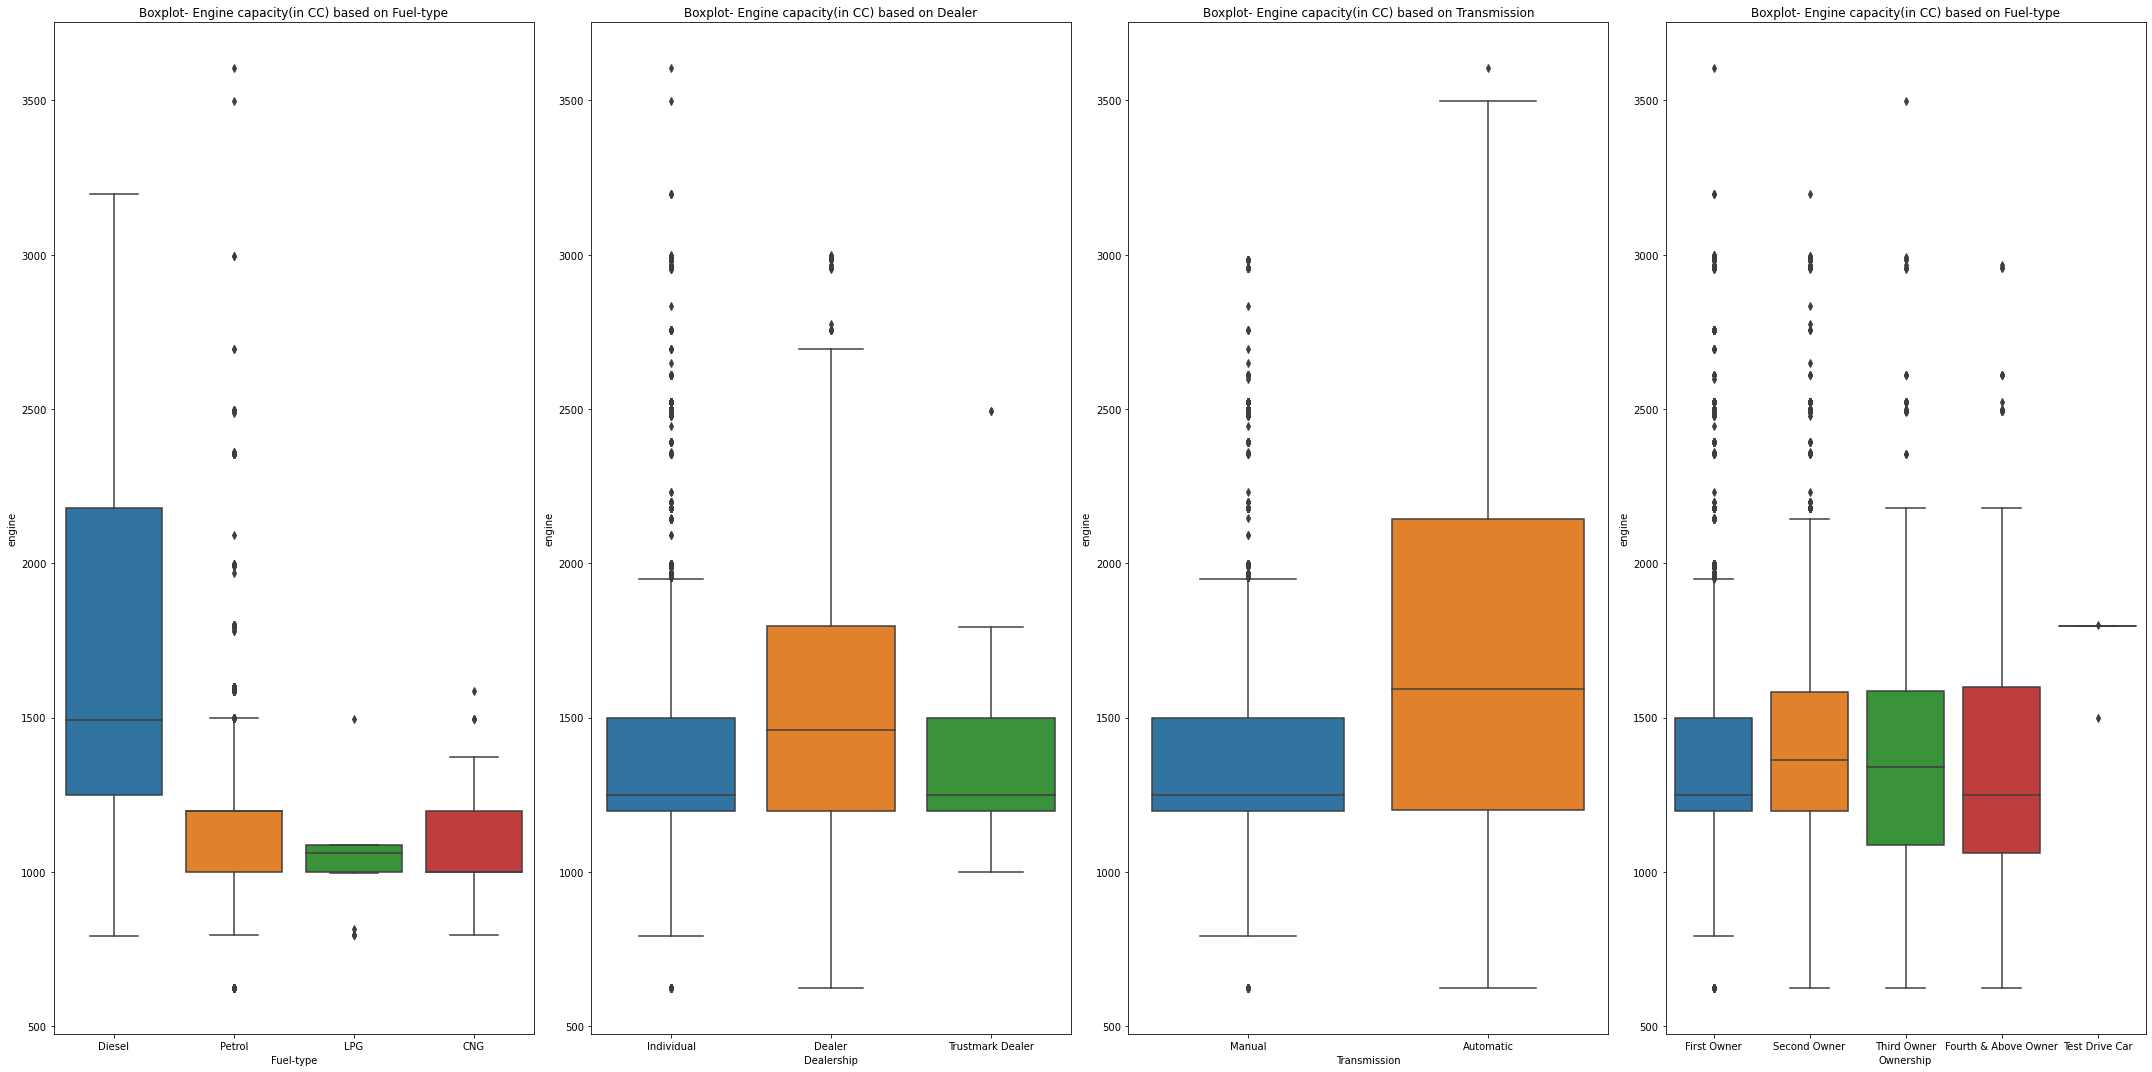

<Figure size 432x288 with 0 Axes>

In [40]:
figure, ax = plt.subplots(1,4, figsize=(30, 15))

sns.boxplot(x='fuel', y="engine", ax=ax[0], data=df_clean).set(title='Boxplot- Engine capacity(in CC) based on Fuel-type', xlabel='Fuel-type')
sns.boxplot(x='seller_type', y="engine", ax=ax[1], data=df_clean).set(title='Boxplot- Engine capacity(in CC) based on Dealer', xlabel='Dealership')
sns.boxplot(x='transmission', y="engine", ax=ax[2], data=df_clean).set(title='Boxplot- Engine capacity(in CC) based on Transmission', xlabel='Transmission')
sns.boxplot(x='owner', y="engine", ax=ax[3], data=df_clean).set(title='Boxplot- Engine capacity(in CC) based on Fuel-type', xlabel='Ownership')

save_fig('Engine Capacity(cc) vs categorical features')

plt.show()
plt.tight_layout()

Figure saved


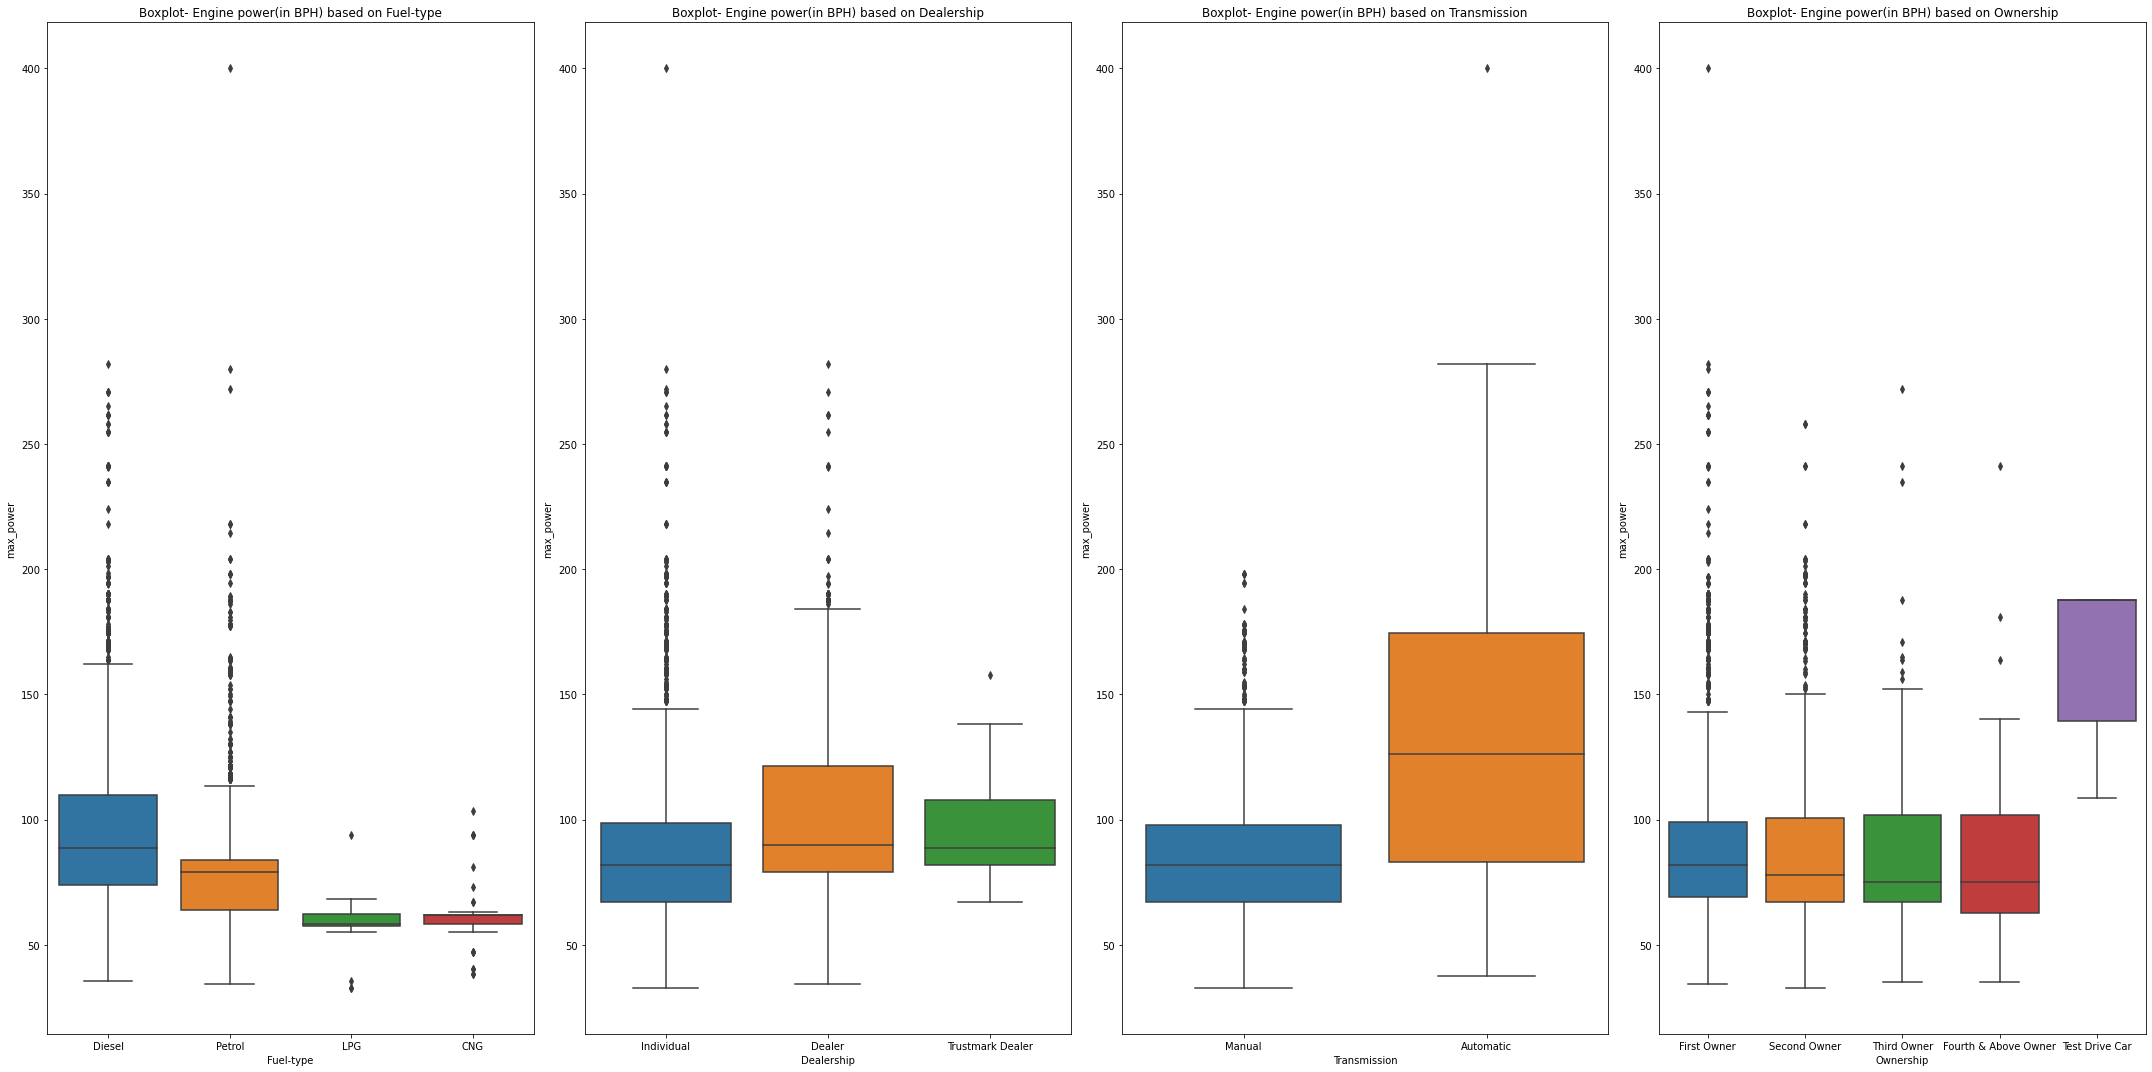

<Figure size 432x288 with 0 Axes>

In [41]:
figure, ax = plt.subplots(1,4, figsize=(30, 15))

sns.boxplot(x='fuel', y="max_power", ax=ax[0], data=df_clean).set(title='Boxplot- Engine power(in BPH) based on Fuel-type', xlabel='Fuel-type')
sns.boxplot(x='seller_type', y="max_power", ax=ax[1], data=df_clean).set(title='Boxplot- Engine power(in BPH) based on Dealership', xlabel='Dealership')
sns.boxplot(x='transmission', y="max_power", ax=ax[2], data=df_clean).set(title='Boxplot- Engine power(in BPH) based on Transmission', xlabel='Transmission')
sns.boxplot(x='owner', y="max_power", ax=ax[3], data=df_clean).set(title='Boxplot- Engine power(in BPH) based on Ownership', xlabel='Ownership')

save_fig('Engine power(BHP) vs categorical features')

plt.show()
plt.tight_layout()

In [42]:
# We have explored the categorical features in the dataset based on numerical categories!
# Let's go a bit deeper and explore these numerical features based on car models!

# Create a new DataFrame with car name and its features!
att = ['name','selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']
df_car_details = df_clean[att]

# Dividing the selling price by 1,00,000 (1 lakh) to get a simplify the selling price
df_car_details['selling_price'] = df_car_details['selling_price']/100000

# Dividing the km_driven by 1,000 
df_car_details['km_driven'] = df_car_details['km_driven']/1000
df_car_details

,name,selling_price,km_driven,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,4.50,145.5,23.40,1248,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,3.70,120.0,21.14,1498,103.52,5.0
2,Honda City 2017-2020 EXi,1.58,140.0,17.70,1497,78.00,5.0
3,Hyundai i20 Sportz Diesel,2.25,127.0,23.00,1396,90.00,5.0
4,Maruti Swift VXI BSIII,1.30,120.0,16.10,1298,88.20,5.0
...,...,...,...,...,...,...,...
6712,Hyundai i20 Magna 1.4 CRDi,4.75,80.0,22.54,1396,88.73,5.0
6713,Hyundai i20 Magna,3.20,110.0,18.50,1197,82.85,5.0
6714,Hyundai Verna CRDi SX,1.35,119.0,16.80,1493,110.00,5.0
6715,Maruti Swift Dzire ZDi,3.82,120.0,19.30,1248,73.90,5.0


In [43]:
# Let's explore our car models based on price, km_driven, mileage, engine, and max power
df_car_details_sorted_price = df_car_details.sort_values(by=['selling_price'], ascending=False).iloc[:50]
df_car_details_sorted_price_asc = df_car_details.sort_values(by=['selling_price'], ascending=True).iloc[:50]

df_car_details_sorted_driven = df_car_details.sort_values(by=['km_driven'], ascending=False).iloc[:50]
df_car_details_sorted_driven_asc = df_car_details.sort_values(by=['km_driven'], ascending=True).iloc[:50]

df_car_details_sorted_mileage = df_car_details.sort_values(by=['mileage'], ascending=False).iloc[:50]
df_car_details_sorted_mileage_asc = df_car_details.sort_values(by=['mileage'], ascending=True).iloc[:50]

df_car_details_sorted_engine = df_car_details.sort_values(by=['engine'], ascending=False).iloc[:50]
df_car_details_sorted_engine_asc = df_car_details.sort_values(by=['engine'], ascending=True).iloc[:50]

df_car_details_sorted_power = df_car_details.sort_values(by=['max_power'], ascending=False).iloc[:50]
df_car_details_sorted_power_asc = df_car_details.sort_values(by=['max_power'], ascending=True).iloc[:50]

Figure saved


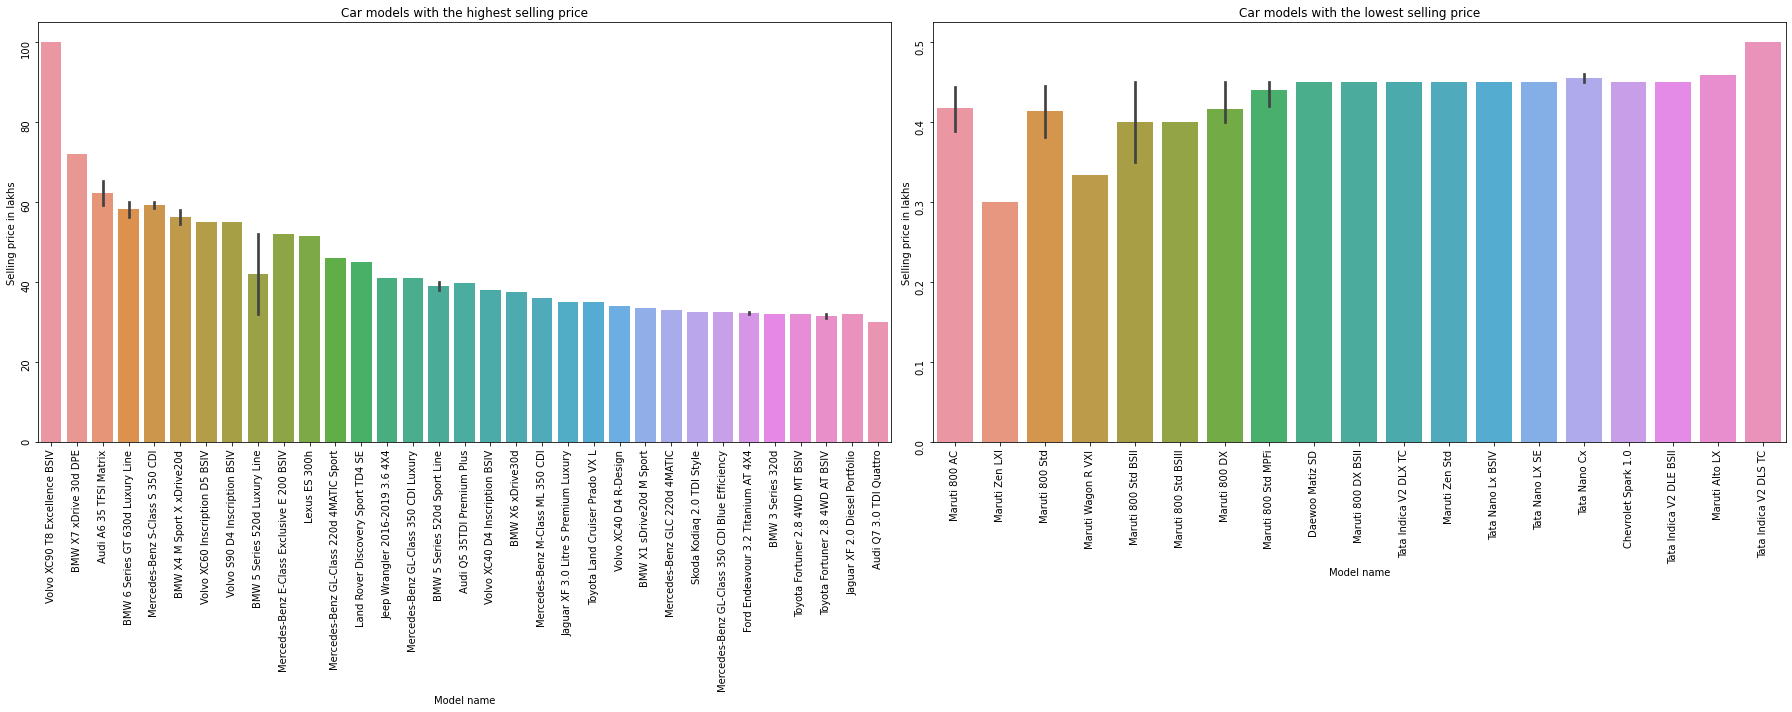

<Figure size 432x288 with 0 Axes>

In [44]:
%matplotlib inline
figure, axes = plt.subplots(1, 2, figsize=(25, 10))

sns.barplot(x='name', y='selling_price', ax=axes[0], data=df_car_details_sorted_price).set(xlabel='Model name', ylabel='Selling price in lakhs', title='Car models with the highest selling price')
sns.barplot(x='name', y='selling_price', ax=axes[1], data=df_car_details_sorted_price_asc).set(xlabel='Model name', ylabel='Selling price in lakhs', title='Car models with the lowest selling price')

for subplot in axes:
    subplot.tick_params(rotation=90)
    
    
save_fig('Cars with highest and lowest prices')
    
plt.show()
plt.tight_layout()

Figure saved


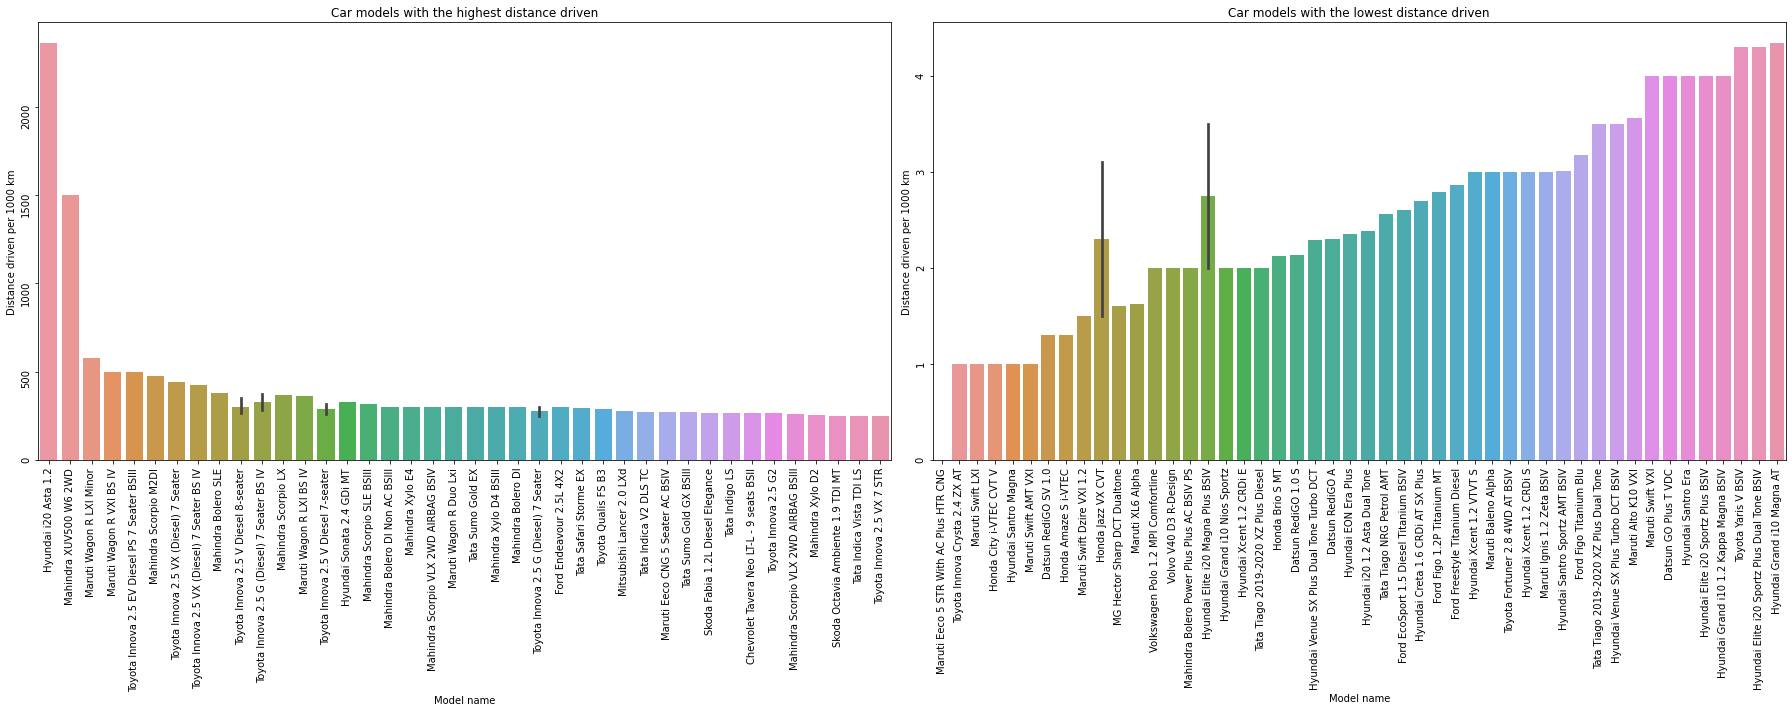

<Figure size 432x288 with 0 Axes>

In [45]:
%matplotlib inline
figure, axes = plt.subplots(1, 2, figsize=(25, 10))

sns.barplot(x='name', y='km_driven', ax=axes[0], data=df_car_details_sorted_driven).set(xlabel='Model name', ylabel='Distance driven per 1000 km', title='Car models with the highest distance driven')
sns.barplot(x='name', y='km_driven', ax=axes[1], data=df_car_details_sorted_driven_asc).set(xlabel='Model name', ylabel='Distance driven per 1000 km', title='Car models with the lowest distance driven')


for subplot in axes:
    subplot.tick_params(rotation=90)

save_fig('Cars with highest and lowest distance travelled')    
    
plt.show()
plt.tight_layout()

Figure saved


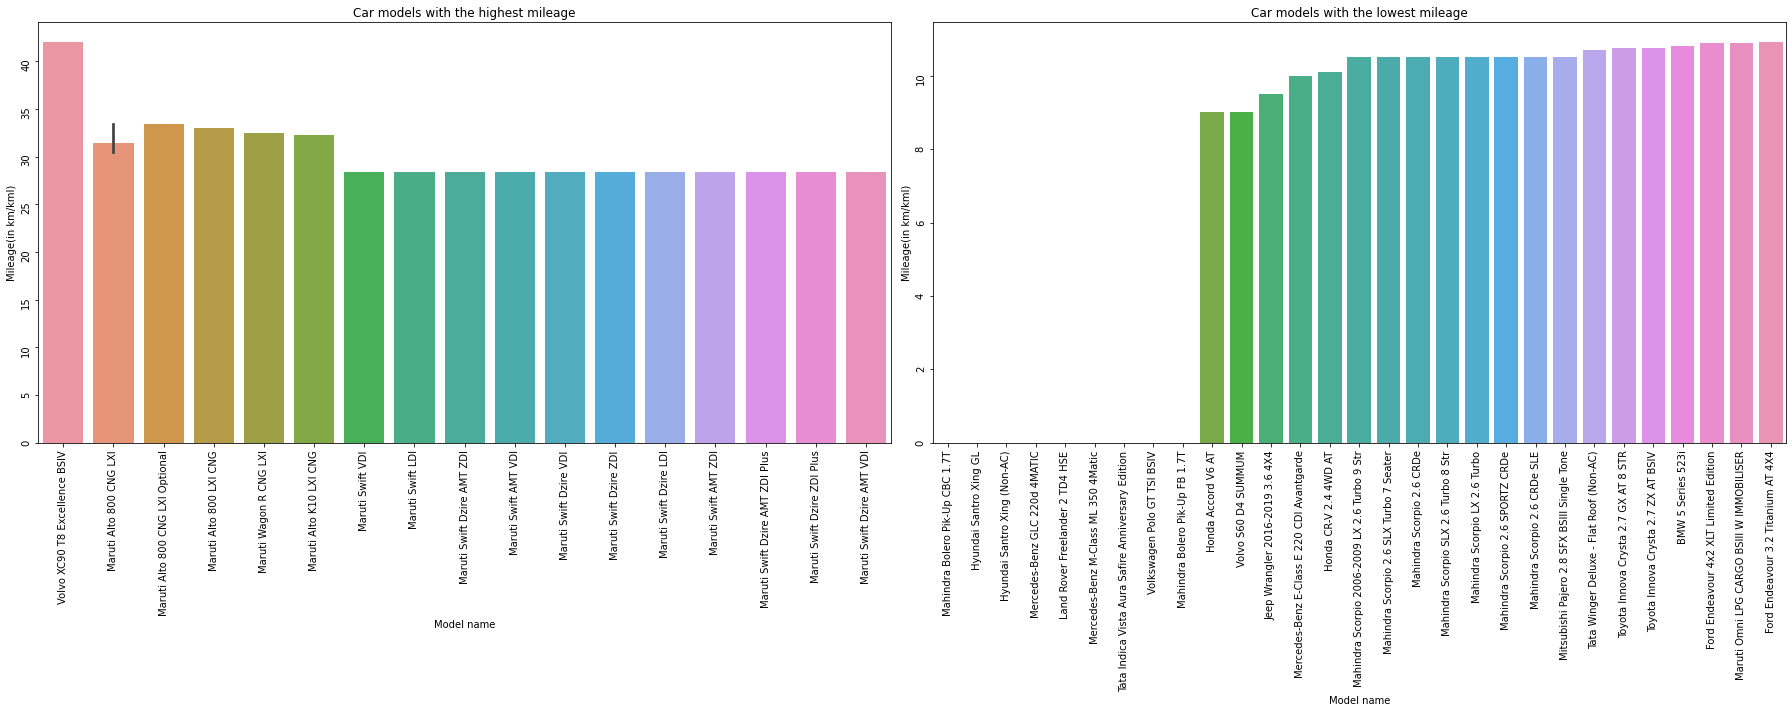

<Figure size 432x288 with 0 Axes>

In [46]:
%matplotlib inline
figure, axes = plt.subplots(1, 2, figsize=(25, 10))

sns.barplot(x='name', y='mileage', ax=axes[0], data=df_car_details_sorted_mileage).set(xlabel='Model name', ylabel='Mileage(in km/kml)', title='Car models with the highest mileage')
sns.barplot(x='name', y='mileage', ax=axes[1], data=df_car_details_sorted_mileage_asc).set(xlabel='Model name', ylabel='Mileage(in km/kml)', title='Car models with the lowest mileage')


for subplot in axes:
    subplot.tick_params(rotation=90)
    
save_fig('Cars with highest and lowest mileage')    

plt.show()
plt.tight_layout()

Figure saved


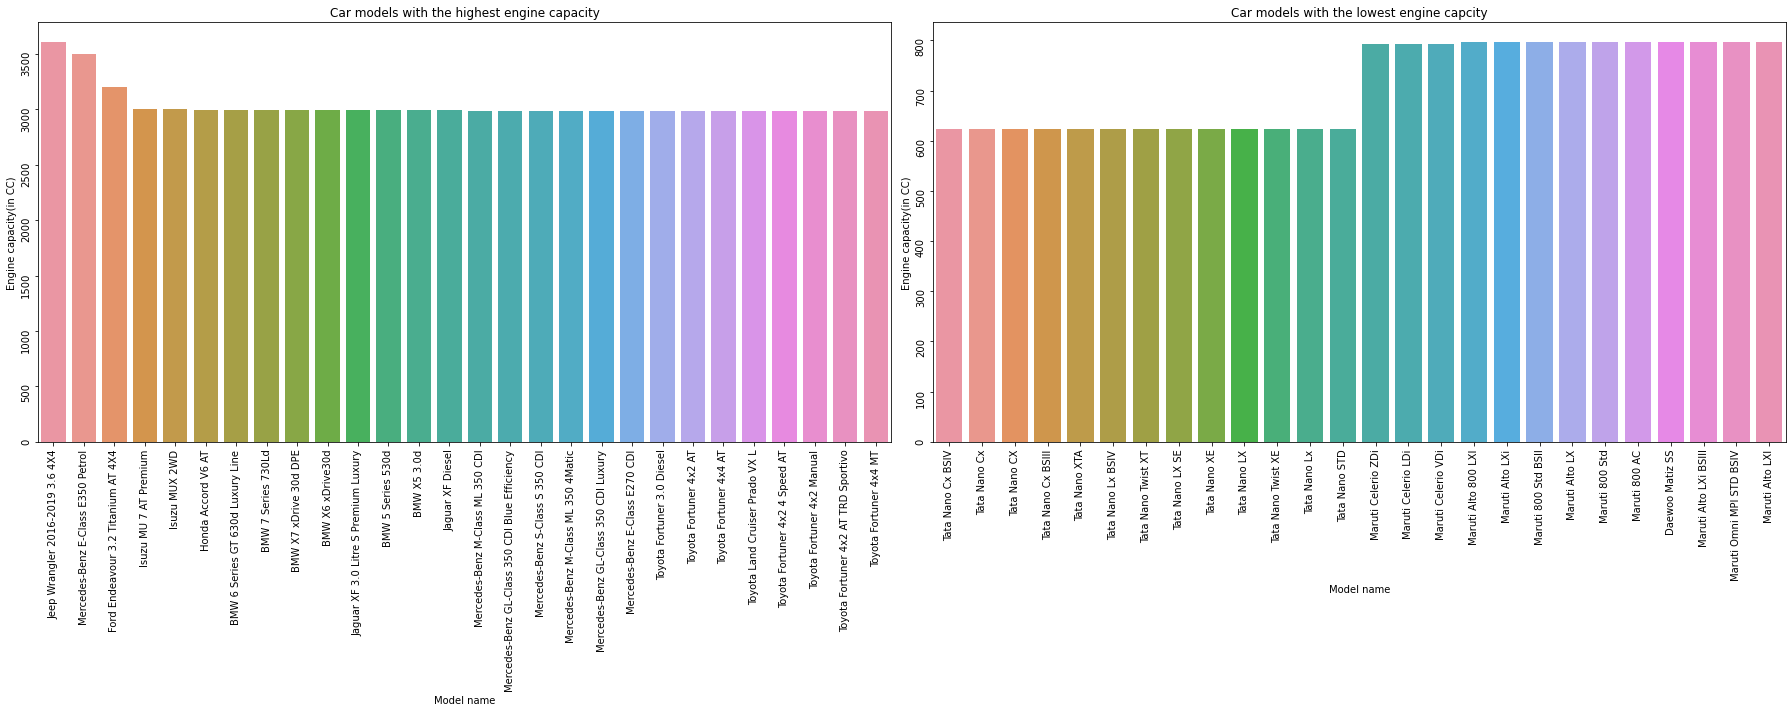

<Figure size 432x288 with 0 Axes>

In [47]:
%matplotlib inline
figure, axes = plt.subplots(1, 2, figsize=(25, 10))

sns.barplot(x='name', y='engine', ax=axes[0], data=df_car_details_sorted_engine).set(xlabel='Model name', ylabel='Engine capacity(in CC)', title='Car models with the highest engine capacity')
sns.barplot(x='name', y='engine', ax=axes[1], data=df_car_details_sorted_engine_asc).set(xlabel='Model name', ylabel='Engine capacity(in CC)', title='Car models with the lowest engine capcity')


for subplot in axes:
    subplot.tick_params(rotation=90)
     
save_fig('Cars with highest and lowest engine capacity')   

plt.show()
plt.tight_layout()

Figure saved


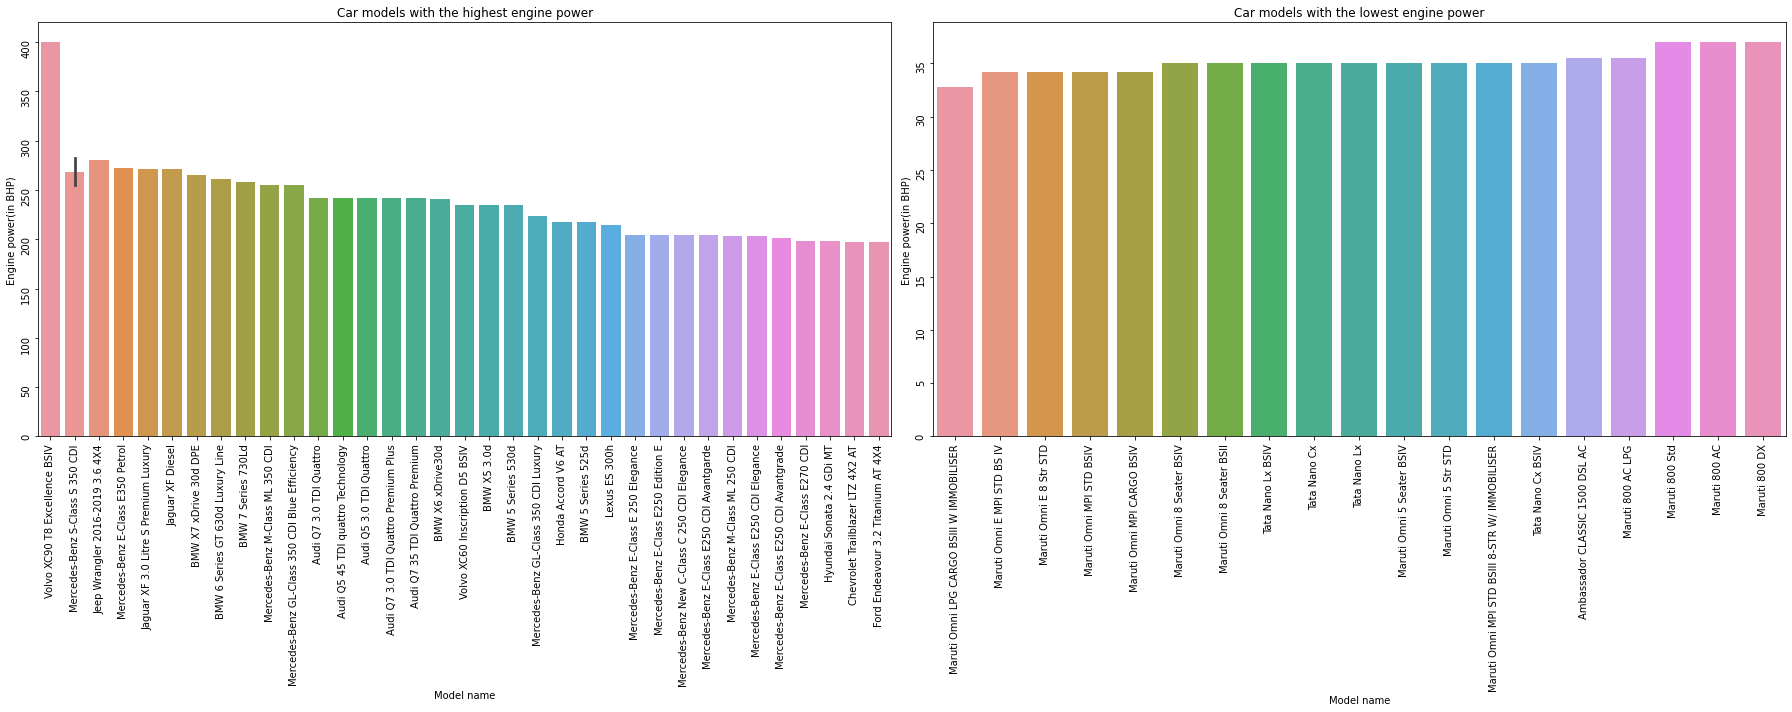

<Figure size 432x288 with 0 Axes>

In [48]:
%matplotlib inline
figure, axes = plt.subplots(1, 2, figsize=(25, 10))

sns.barplot(x='name', y='max_power', ax=axes[0], data=df_car_details_sorted_power).set(xlabel='Model name', ylabel='Engine power(in BHP)', title='Car models with the highest engine power')
sns.barplot(x='name', y='max_power', ax=axes[1], data=df_car_details_sorted_power_asc).set(xlabel='Model name', ylabel='Engine power(in BHP)', title='Car models with the lowest engine power')


for subplot in axes:
    subplot.tick_params(rotation=90)

save_fig('Cars with highest and lowest engine power')     
    
plt.show()
plt.tight_layout()

In [49]:
# Multi-variable analysis and correlation!
# Let's hist- and scatter-plot our dataset and see its distribution!
df_clean.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,company
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0,Maruti


In [50]:
# From the above plots we can see that some of our data may be missing!
# Some of our car models showed zero('0') mileage! So, either these cars are being sold directly from the factory or we have some data mssing!
# Let's look at these zero mileage models and see what could we do!
df_clean.loc[df_clean['mileage'] == 0]

# These models seem to have been driven for a while. So, it is very unlikely that these cars are brand new!
# So, assuming that these cars are missing their mileage data, we can drop these rows!

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,company
457,Tata Indica Vista Aura Safire Anniversary Edition,2009,135000,28900,Petrol,Individual,Manual,Second Owner,0.0,1172,65.00,5.0,Tata
568,Hyundai Santro Xing GL,2009,120000,90000,Petrol,Individual,Manual,Second Owner,0.0,1086,62.00,5.0,Hyundai
1238,Hyundai Santro Xing GL,2008,105000,128000,Petrol,Individual,Manual,First Owner,0.0,1086,62.00,5.0,Hyundai
1579,Land Rover Freelander 2 TD4 HSE,2013,1650000,64788,Diesel,Dealer,Automatic,First Owner,0.0,2179,115.00,5.0,Land
2079,Hyundai Santro Xing (Non-AC),2013,184000,15000,Petrol,Individual,Manual,First Owner,0.0,1086,62.10,5.0,Hyundai
3513,Mercedes-Benz M-Class ML 350 4Matic,2011,1700000,110000,Diesel,Individual,Automatic,Third Owner,0.0,2987,165.00,5.0,Mercedes-Benz
4162,Hyundai Santro Xing GL,2008,175000,40000,Petrol,Individual,Manual,First Owner,0.0,1086,62.00,5.0,Hyundai
4661,Volkswagen Polo GT TSI BSIV,2014,574000,28080,Petrol,Dealer,Automatic,First Owner,0.0,1197,103.25,5.0,Volkswagen
4664,Volkswagen Polo GT TSI BSIV,2014,575000,28100,Petrol,Dealer,Automatic,First Owner,0.0,1197,103.25,5.0,Volkswagen
4718,Mahindra Bolero Pik-Up FB 1.7T,2020,679000,5000,Diesel,Individual,Manual,First Owner,0.0,2523,70.00,2.0,Mahindra


In [51]:
df_clean.loc[df_clean['mileage'] == 0].shape

(15, 13)

In [52]:
df_clean.shape

(6717, 13)

In [53]:
index_names = df_clean.loc[df_clean['mileage'] == 0].index
index_names

Int64Index([ 457,  568, 1238, 1579, 2079, 3513, 4162, 4661, 4664, 4718, 5304,
            5359, 5529, 5683, 6005],
           dtype='int64')

In [54]:
df_clean = df_clean.drop(index_names)
df_clean

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,company
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6712,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396,88.73,5.0,Hyundai
6713,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5.0,Hyundai
6714,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5.0,Hyundai
6715,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248,73.90,5.0,Maruti


In [55]:
df_clean.shape

(6702, 13)

In [56]:
df_clean = df_clean.reset_index()
df_clean = df_clean.drop(['index'], axis=1)
df_clean

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,company
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6697,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396,88.73,5.0,Hyundai
6698,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5.0,Hyundai
6699,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5.0,Hyundai
6700,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248,73.90,5.0,Maruti


In [57]:
# Let's build our model to predict car prices!
# Our target variable will be 'selling_price'
# Let's build two models: Linear Regression model and Random Forest and compare their accuracies!
# Before building the model, let's note some important aspects:
#                            1. Our dataset is clean i.e it has no null or duplicate values!
#                            2. The dataset has 4 categorical features(['fuel', 'seller_type', 'transmission', 'owner']) that we have to convert into numerical data!
#                            3. The dataset has 7-1 numerical features(['selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']) that we have to scale!
#                            4. The dataset has a lot of Outliers which we have to remove!
#                            5. The dataset has multicollinearity which will affect our Regression model!

In [58]:
# Model making: Based on above info, we should convert our categorical data into numerical data first!
# Let's look at our categorical and numerical data!

In [59]:
attr_cat = ['fuel', 'seller_type', 'transmission', 'owner']
attr_num = ['selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

print(df_clean[attr_cat]) # Categorical variables
print(df_clean[attr_num]) # Numerical variables

        fuel seller_type transmission                 owner
0     Diesel  Individual       Manual           First Owner
1     Diesel  Individual       Manual          Second Owner
2     Petrol  Individual       Manual           Third Owner
3     Diesel  Individual       Manual           First Owner
4     Petrol  Individual       Manual           First Owner
...      ...         ...          ...                   ...
6697  Diesel  Individual       Manual          Second Owner
6698  Petrol  Individual       Manual           First Owner
6699  Diesel  Individual       Manual  Fourth & Above Owner
6700  Diesel  Individual       Manual           First Owner
6701  Diesel  Individual       Manual           First Owner

[6702 rows x 4 columns]
      selling_price  km_driven  mileage  engine  max_power  seats
0            450000     145500    23.40    1248      74.00    5.0
1            370000     120000    21.14    1498     103.52    5.0
2            158000     140000    17.70    1497      78.0

Figure saved


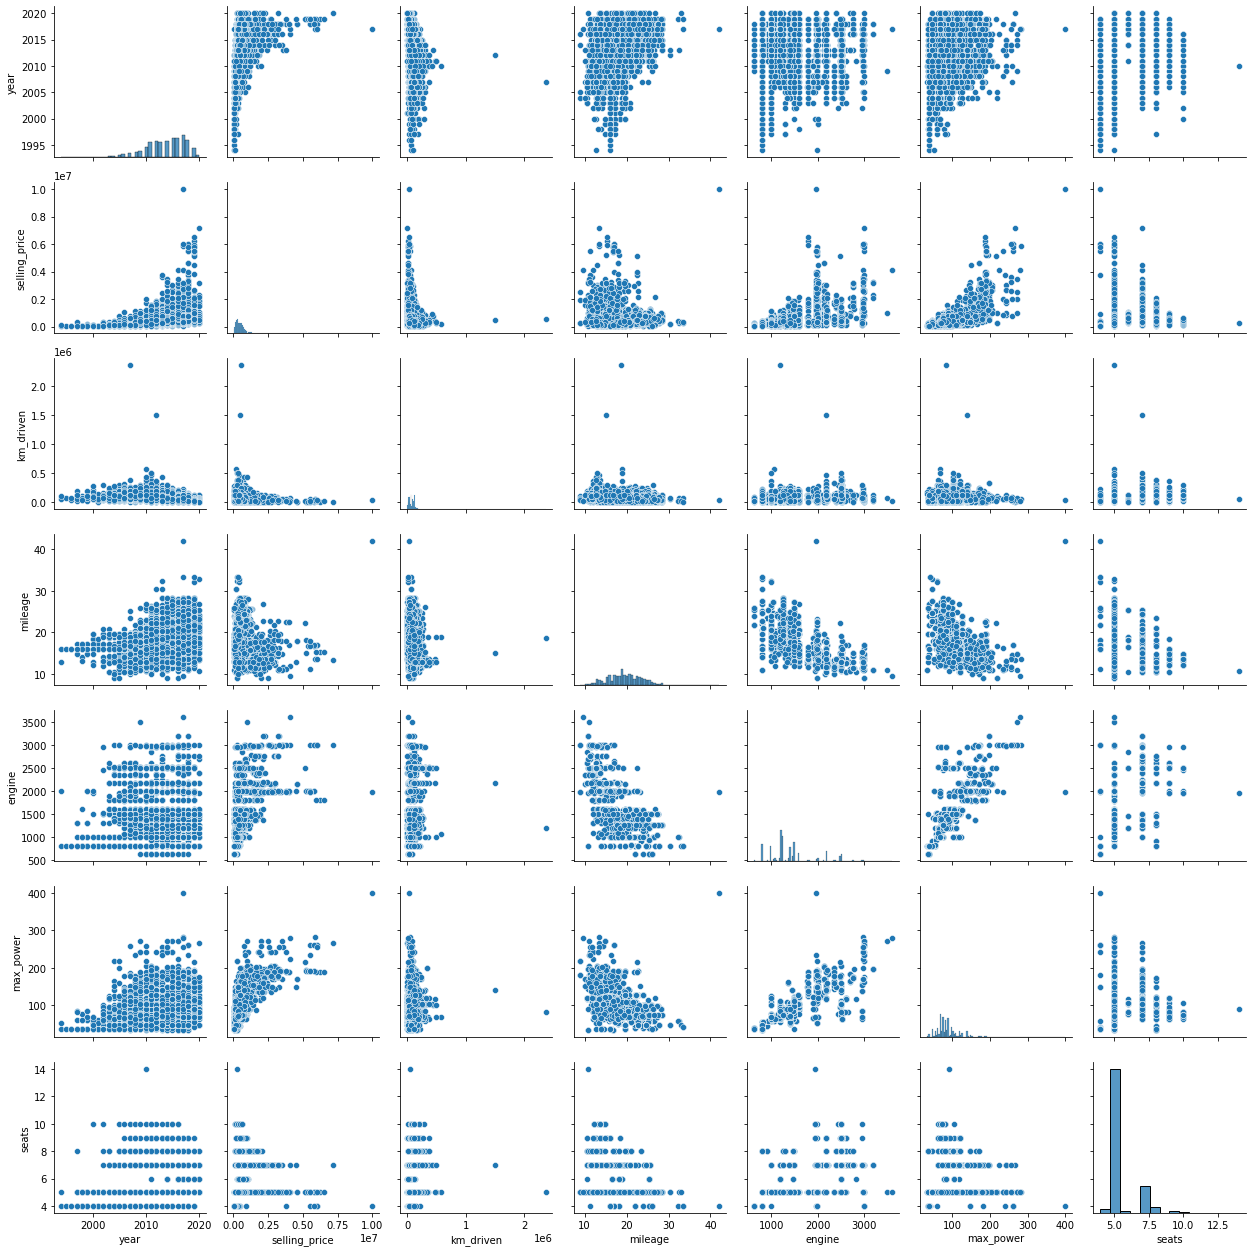

<Figure size 432x288 with 0 Axes>

In [60]:
# Let's use the hist feature of matplotlib to map-out all the numerical variables against each other
%matplotlib inline
sns.pairplot(df_clean)
save_fig("Attribute_histogram_plots_car_prices")
plt.show()
plt.tight_layout()

In [61]:
# Make and use a copy our dataset!
df_preprocessed = df_clean.copy()
df_preprocessed

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,company
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6697,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396,88.73,5.0,Hyundai
6698,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5.0,Hyundai
6699,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5.0,Hyundai
6700,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248,73.90,5.0,Maruti


In [62]:
# Import libraries!
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

# NOTE: I would be using OneHotEncoder/ Dummy-values to convert all of the categorical features. Since there is no order in these categories(maybe expect owner type),
#-it will be a better idea to use the above encoder!
# I would also use min-max scaler to transform our numerical features!

In [63]:
# One-Hot
one_hot_encoded_data = pd.get_dummies(df_preprocessed, columns = ['fuel', 'seller_type', 'transmission', 'owner'])
print(one_hot_encoded_data.columns, '\n')
one_hot_encoded_data

Index(['name', 'year', 'selling_price', 'km_driven', 'mileage', 'engine',
       'max_power', 'seats', 'company', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Automatic',
       'transmission_Manual', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object') 



,name,year,selling_price,km_driven,mileage,engine,max_power,seats,company,fuel_CNG,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti Swift Dzire VDI,2014,450000,145500,23.40,1248,74.00,5.0,Maruti,0,...,0,1,0,0,1,1,0,0,0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,21.14,1498,103.52,5.0,Skoda,0,...,0,1,0,0,1,0,0,1,0,0
2,Honda City 2017-2020 EXi,2006,158000,140000,17.70,1497,78.00,5.0,Honda,0,...,0,1,0,0,1,0,0,0,0,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000,23.00,1396,90.00,5.0,Hyundai,0,...,0,1,0,0,1,1,0,0,0,0
4,Maruti Swift VXI BSIII,2007,130000,120000,16.10,1298,88.20,5.0,Maruti,0,...,0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6697,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,22.54,1396,88.73,5.0,Hyundai,0,...,0,1,0,0,1,0,0,1,0,0
6698,Hyundai i20 Magna,2013,320000,110000,18.50,1197,82.85,5.0,Hyundai,0,...,0,1,0,0,1,1,0,0,0,0
6699,Hyundai Verna CRDi SX,2007,135000,119000,16.80,1493,110.00,5.0,Hyundai,0,...,0,1,0,0,1,0,1,0,0,0
6700,Maruti Swift Dzire ZDi,2009,382000,120000,19.30,1248,73.90,5.0,Maruti,0,...,0,1,0,0,1,1,0,0,0,0


In [64]:
one_hot_encoded_data.head()

,name,year,selling_price,km_driven,mileage,engine,max_power,seats,company,fuel_CNG,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti Swift Dzire VDI,2014,450000,145500,23.40,1248,74.00,5.0,Maruti,0,...,0,1,0,0,1,1,0,0,0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,21.14,1498,103.52,5.0,Skoda,0,...,0,1,0,0,1,0,0,1,0,0
2,Honda City 2017-2020 EXi,2006,158000,140000,17.70,1497,78.00,5.0,Honda,0,...,0,1,0,0,1,0,0,0,0,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000,23.00,1396,90.00,5.0,Hyundai,0,...,0,1,0,0,1,1,0,0,0,0
4,Maruti Swift VXI BSIII,2007,130000,120000,16.10,1298,88.20,5.0,Maruti,0,...,0,1,0,0,1,1,0,0,0,0


Figure saved


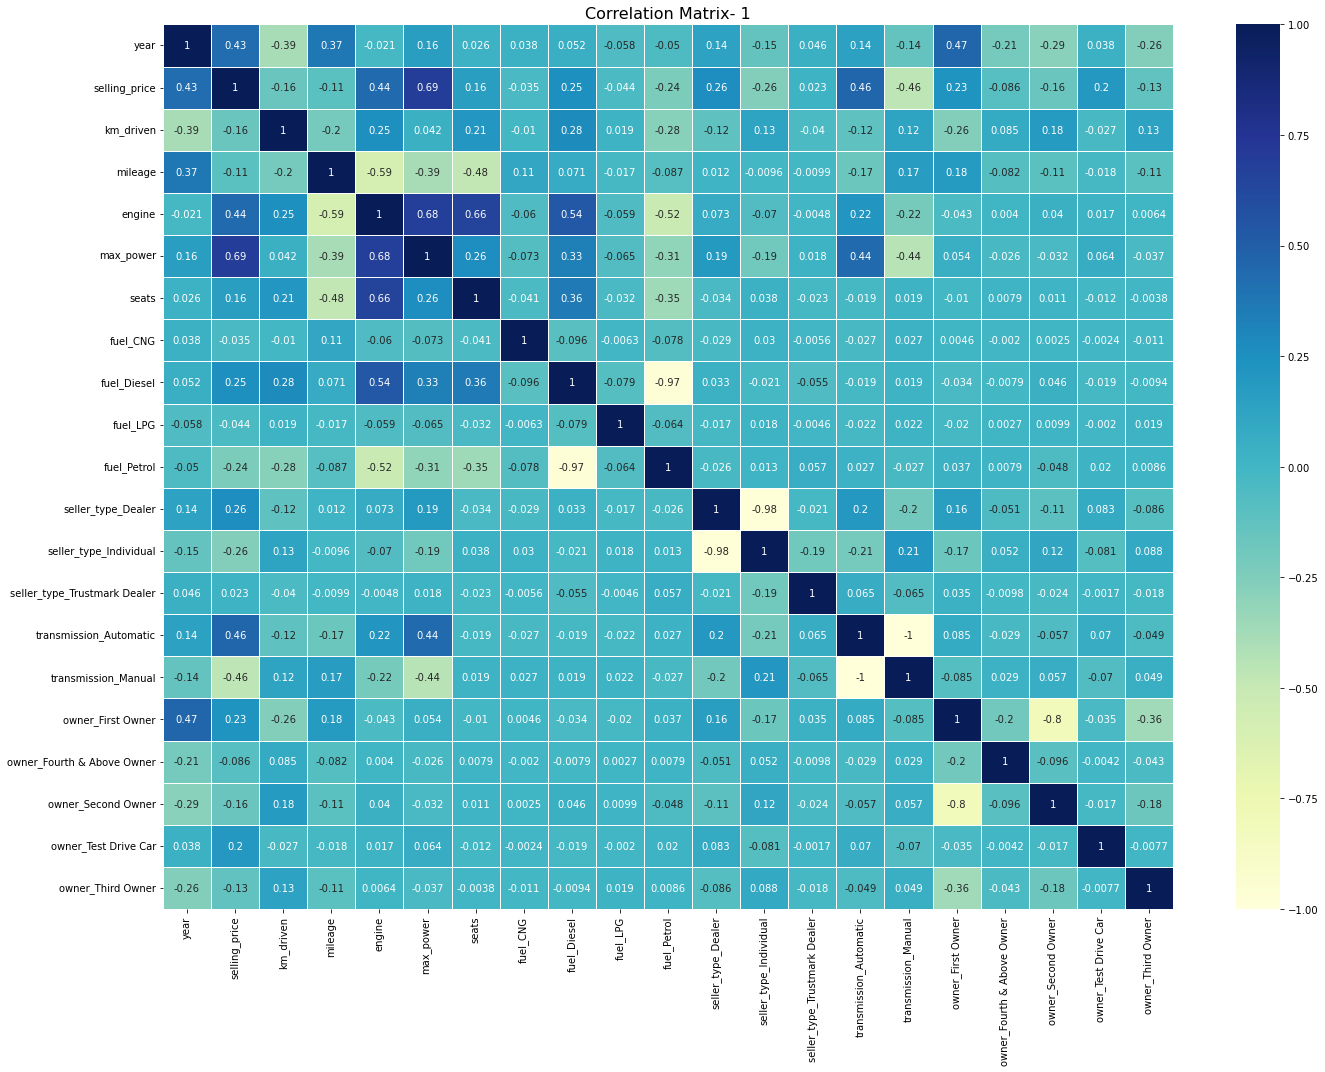

<Figure size 432x288 with 0 Axes>

In [65]:
corr = one_hot_encoded_data.corr()

%matplotlib inline
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr, cmap="YlGnBu", linewidth = 0.5, annot=True)
plt.title("Correlation Matrix- 1", fontsize=16)

save_fig('Car prices Correlation matrix-1')

plt.show()
plt.tight_layout()

In [66]:
# Let's check the correlation between our features!
corr["selling_price"].sort_values(ascending=False)

selling_price                   1.000000
max_power                       0.691354
transmission_Automatic          0.463834
engine                          0.441895
year                            0.427717
seller_type_Dealer              0.257992
fuel_Diesel                     0.252788
owner_First Owner               0.230681
owner_Test Drive Car            0.202809
seats                           0.159964
seller_type_Trustmark Dealer    0.023384
fuel_CNG                       -0.034923
fuel_LPG                       -0.043705
owner_Fourth & Above Owner     -0.086160
mileage                        -0.108498
owner_Third Owner              -0.128838
owner_Second Owner             -0.157697
km_driven                      -0.161845
fuel_Petrol                    -0.241010
seller_type_Individual         -0.258331
transmission_Manual            -0.463834
Name: selling_price, dtype: float64

In [67]:
# Let's scale our numerical data first!
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

one_hot_encoded_data[attr_num] = scaler.fit_transform(one_hot_encoded_data[attr_num])
one_hot_encoded_data

,name,year,selling_price,km_driven,mileage,engine,max_power,seats,company,fuel_CNG,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti Swift Dzire VDI,2014,0.042126,0.061640,0.436364,0.209396,0.112200,0.1,Maruti,0,...,0,1,0,0,1,1,0,0,0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,0.034102,0.050837,0.367879,0.293289,0.192593,0.1,Skoda,0,...,0,1,0,0,1,0,0,1,0,0
2,Honda City 2017-2020 EXi,2006,0.012839,0.059310,0.263636,0.292953,0.123094,0.1,Honda,0,...,0,1,0,0,1,0,0,0,0,1
3,Hyundai i20 Sportz Diesel,2010,0.019559,0.053803,0.424242,0.259060,0.155773,0.1,Hyundai,0,...,0,1,0,0,1,1,0,0,0,0
4,Maruti Swift VXI BSIII,2007,0.010030,0.050837,0.215152,0.226174,0.150871,0.1,Maruti,0,...,0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6697,Hyundai i20 Magna 1.4 CRDi,2014,0.044634,0.033891,0.410303,0.259060,0.152315,0.1,Hyundai,0,...,0,1,0,0,1,0,0,1,0,0
6698,Hyundai i20 Magna,2013,0.029087,0.046601,0.287879,0.192282,0.136302,0.1,Hyundai,0,...,0,1,0,0,1,1,0,0,0,0
6699,Hyundai Verna CRDi SX,2007,0.010532,0.050414,0.236364,0.291611,0.210240,0.1,Hyundai,0,...,0,1,0,0,1,0,1,0,0,0
6700,Maruti Swift Dzire ZDi,2009,0.035306,0.050837,0.312121,0.209396,0.111928,0.1,Maruti,0,...,0,1,0,0,1,1,0,0,0,0


In [68]:
# Drop the columns['fuel_Petrol', 'transmission_Manual', 'seller_type_Individual', 'owner_Test Drive Car' ] as we can identify these columns
#-by the other-same-variable columns! (also because of their negative correlation with the target variable!)
# for example:

one_hot_encoded_data = one_hot_encoded_data.drop(['fuel_Petrol', 'transmission_Manual', 'seller_type_Individual', 'owner_Test Drive Car'], axis=1)
one_hot_encoded_data

,name,year,selling_price,km_driven,mileage,engine,max_power,seats,company,fuel_CNG,fuel_Diesel,fuel_LPG,seller_type_Dealer,seller_type_Trustmark Dealer,transmission_Automatic,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Third Owner
0,Maruti Swift Dzire VDI,2014,0.042126,0.061640,0.436364,0.209396,0.112200,0.1,Maruti,0,1,0,0,0,0,1,0,0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,0.034102,0.050837,0.367879,0.293289,0.192593,0.1,Skoda,0,1,0,0,0,0,0,0,1,0
2,Honda City 2017-2020 EXi,2006,0.012839,0.059310,0.263636,0.292953,0.123094,0.1,Honda,0,0,0,0,0,0,0,0,0,1
3,Hyundai i20 Sportz Diesel,2010,0.019559,0.053803,0.424242,0.259060,0.155773,0.1,Hyundai,0,1,0,0,0,0,1,0,0,0
4,Maruti Swift VXI BSIII,2007,0.010030,0.050837,0.215152,0.226174,0.150871,0.1,Maruti,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6697,Hyundai i20 Magna 1.4 CRDi,2014,0.044634,0.033891,0.410303,0.259060,0.152315,0.1,Hyundai,0,1,0,0,0,0,0,0,1,0
6698,Hyundai i20 Magna,2013,0.029087,0.046601,0.287879,0.192282,0.136302,0.1,Hyundai,0,0,0,0,0,0,1,0,0,0
6699,Hyundai Verna CRDi SX,2007,0.010532,0.050414,0.236364,0.291611,0.210240,0.1,Hyundai,0,1,0,0,0,0,0,1,0,0
6700,Maruti Swift Dzire ZDi,2009,0.035306,0.050837,0.312121,0.209396,0.111928,0.1,Maruti,0,1,0,0,0,0,1,0,0,0


In [69]:
one_hot_encoded_data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'mileage', 'engine',
       'max_power', 'seats', 'company', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG',
       'seller_type_Dealer', 'seller_type_Trustmark Dealer',
       'transmission_Automatic', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Third Owner'],
      dtype='object')

In [70]:
# import libraries!
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as smo
from sklearn.linear_model import LinearRegression

In [71]:
# Let's start building our Linear Regression model!

indepent_var = ['year', 'km_driven', 'mileage', 'engine',
       'max_power', 'seats', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG',
       'seller_type_Dealer', 'seller_type_Trustmark Dealer',
       'transmission_Automatic', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Third Owner']

X = one_hot_encoded_data[indepent_var]
y = one_hot_encoded_data["selling_price"]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [73]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)

print("Accuracy on Traing set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

Accuracy on Traing set:  0.6378248027748032
Accuracy on Testing set:  0.6404950240674857


In [74]:
X_train = sm.add_constant(X_train)

# Using Ordinary Least Square method!
lm = sm.OLS(y_train, X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     588.2
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                        11:19:45   Log-Likelihood:                 11021.
No. Observations:                5361   AIC:                        -2.201e+04
Df Residuals:                    5344   BIC:                        -2.190e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [75]:
# Ok, so our data may have multicollinearity, which we need to remove!
# Also, notice a lot of our features have huge p values! We need to drop them too!

In [76]:
# Let's check out the VIF for these features!
vif_info = pd.DataFrame()
vif_info["VIF"] = [smo.variance_inflation_factor(X[indepent_var].values, ix) for ix in range(X.shape[1])]
vif_info["Columns"] = X.columns
vif_info

,VIF,Columns
0,1409.589896,year
1,3.238715,km_driven
2,22.182420,mileage
3,20.889899,engine
4,10.302283,max_power
5,6.808721,seats
6,1.051357,fuel_CNG
7,5.285502,fuel_Diesel
8,1.016232,fuel_LPG
9,1.219978,seller_type_Dealer


In [77]:
# Let's drop the features with VIF > 10
# And create a new model with the new gathered data!

indepent_var = ['km_driven', 'max_power', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG',
       'seller_type_Dealer', 'seller_type_Trustmark Dealer',
       'transmission_Automatic']

X = one_hot_encoded_data[indepent_var]
y = one_hot_encoded_data["selling_price"]

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [79]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)

print("Accuracy on Traing set: ",linear_reg.score(X_train, y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test, y_test))

Accuracy on Traing set:  0.5510337559643956
Accuracy on Testing set:  0.573190862852567


In [80]:
X_train = sm.add_constant(X_train)

lm = sm.OLS(y_train, X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     821.1
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                        11:19:46   Log-Likelihood:                 10445.
No. Observations:                5361   AIC:                        -2.087e+04
Df Residuals:                    5352   BIC:                        -2.081e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [81]:
# We have remove multicollinearity!
# Although, our R^2 value has decreased, the F-stats value has increased significantly! That means that the model has fitted well with the dataset!
# Let's continue and drop more features with high p-values!

In [82]:
vif_info = pd.DataFrame()
vif_info["VIF"] = [smo.variance_inflation_factor(X[indepent_var].values, ix) for ix in range(X.shape[1])]
vif_info["Columns"] = X.columns
vif_info

,VIF,Columns
0,2.324454,km_driven
1,3.684230,max_power
2,1.008956,fuel_CNG
3,2.760812,fuel_Diesel
4,1.009464,fuel_LPG
5,1.181234,seller_type_Dealer
6,1.010696,seller_type_Trustmark Dealer
7,1.419754,transmission_Automatic


In [83]:
indepent_var = ['km_driven', 'max_power', 'fuel_Diesel',
       'seller_type_Dealer', 'transmission_Automatic']

X = one_hot_encoded_data[indepent_var]
y = one_hot_encoded_data["selling_price"]

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 32)

In [85]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

print("Accuracy on Traing set: ",linear_reg.score(X_train, y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test, y_test))

Accuracy on Traing set:  0.561694856397433
Accuracy on Testing set:  0.5273936147758962


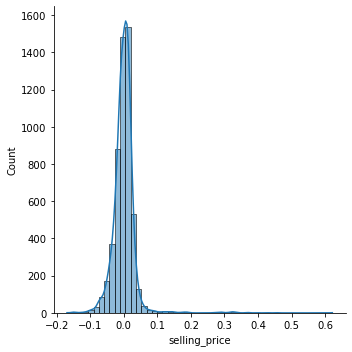

<Figure size 432x288 with 0 Axes>

In [86]:
y_pred = linear_reg.predict(X_train)

%matplotlib inline
sns.displot((y_train - y_pred), bins=50, kde=True)

plt.show()
plt.tight_layout()

In [87]:
# Our error plot is almost normaly distributed i.e model can predict car prices with ~55-56% accuracy!
# Our model can be deployed! But, let's see what we can do further!

In [88]:
X_train = sm.add_constant(X_train)

lm = sm.OLS(y_train, X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     1373.
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                        11:19:46   Log-Likelihood:                 10348.
No. Observations:                5361   AIC:                        -2.068e+04
Df Residuals:                    5355   BIC:                        -2.064e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [89]:
# R^2 of 56% in Train and Test data set meaning our model has fitted data well! Also, we can see that const have a high p-value!
# This may be beacuse of the noise and outliers present in our dataset!

Figure saved


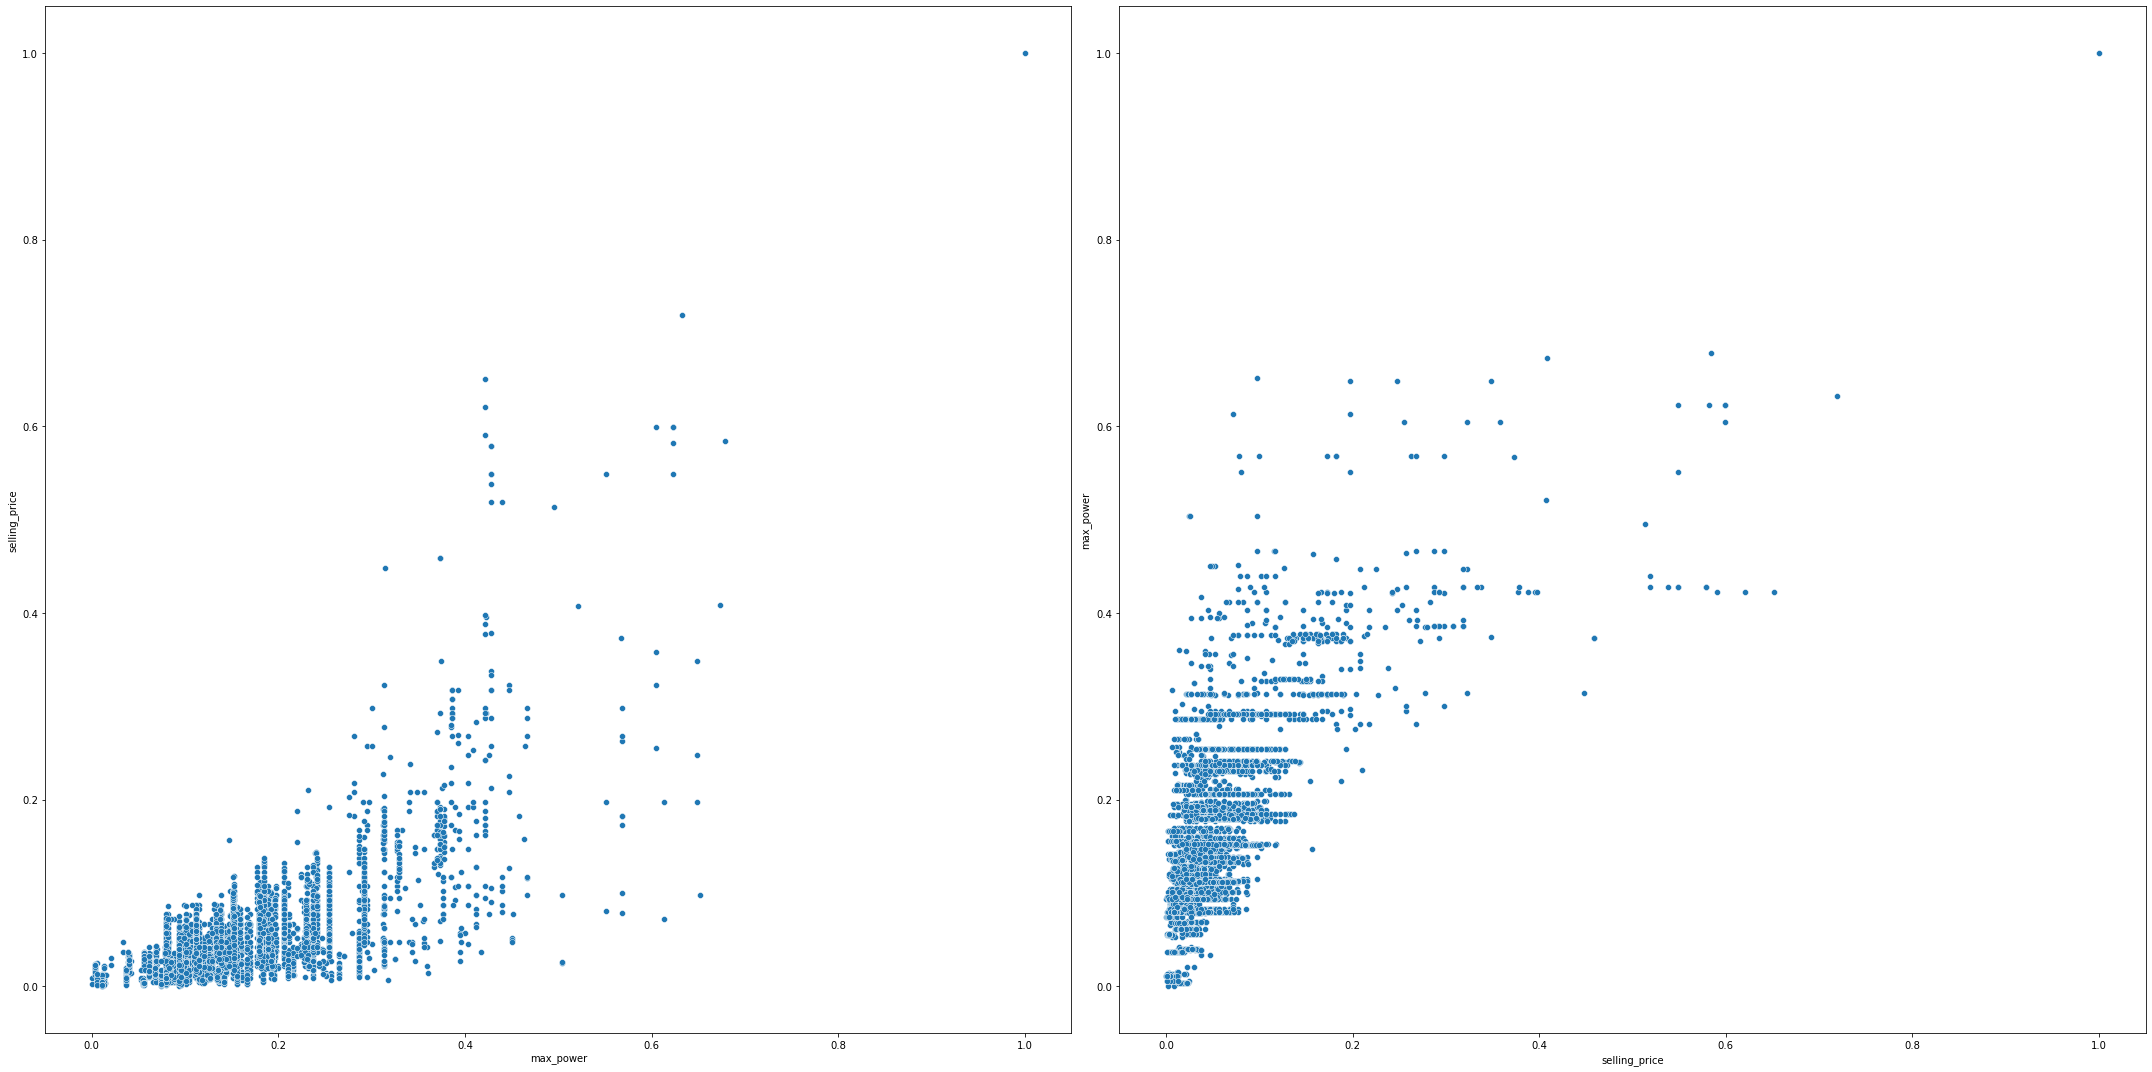

<Figure size 432x288 with 0 Axes>

In [90]:
figure, ax = plt.subplots(1,2, figsize=(30, 15))

sns.scatterplot(x='max_power', y="selling_price", ax=ax[0], data = one_hot_encoded_data)
sns.scatterplot(x='selling_price', y="max_power", ax=ax[1], data = one_hot_encoded_data)

save_fig('Scatter plot- Price vs power')

plt.show()
plt.tight_layout()

In [91]:
# Let's build the above linear model again after removing outliers
df_preprocessed = df_clean.copy()
df_preprocessed

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,company
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6697,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396,88.73,5.0,Hyundai
6698,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5.0,Hyundai
6699,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5.0,Hyundai
6700,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248,73.90,5.0,Maruti


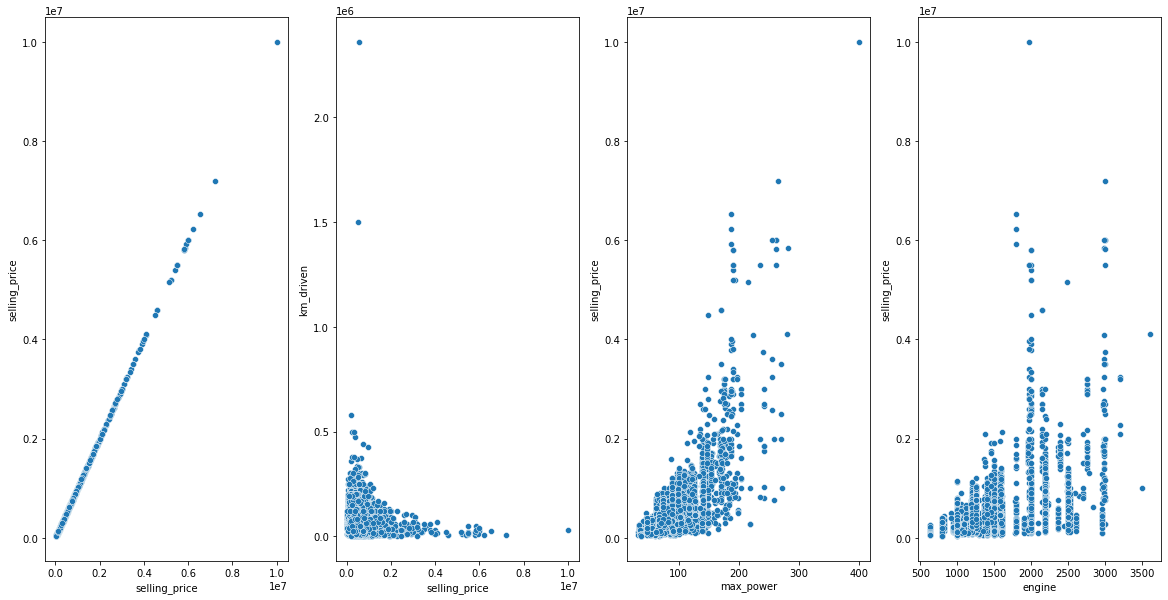

<Figure size 432x288 with 0 Axes>

In [92]:
figure, ax = plt.subplots(1,4, figsize=(20, 10))

sns.scatterplot(x='selling_price', y='selling_price', ax=ax[0], data = df_preprocessed)
sns.scatterplot(x='selling_price', y="km_driven", ax=ax[1], data = df_preprocessed)
sns.scatterplot(x='max_power', y='selling_price', ax=ax[2], data = df_preprocessed)
sns.scatterplot(x='engine', y='selling_price', ax=ax[3], data = df_preprocessed)

plt.show()
plt.tight_layout()

In [93]:
df_preprocessed = df_preprocessed[df_preprocessed['selling_price'] < 6000000] # Models less than 60 lakhs
df_preprocessed = df_preprocessed[df_preprocessed['km_driven'] < 400000] # Models with less than 4 lakh kms
df_preprocessed = df_preprocessed[df_preprocessed['max_power'] < 250] # Models with less than 250 CC
df_preprocessed = df_preprocessed[df_preprocessed['engine'] < 3000] # Models with less than 3000 BHP

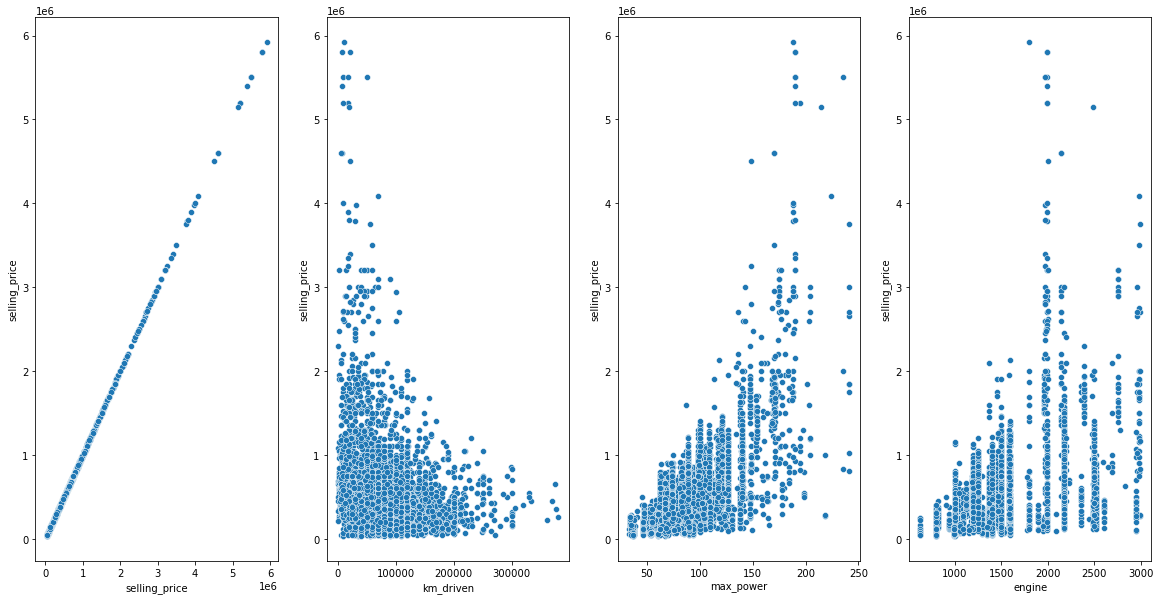

<Figure size 432x288 with 0 Axes>

In [94]:
figure, ax = plt.subplots(1,4, figsize=(20, 10))

sns.scatterplot(x='selling_price', y='selling_price', ax=ax[0], data = df_preprocessed)
sns.scatterplot(x='km_driven', y="selling_price", ax=ax[1], data = df_preprocessed)
sns.scatterplot(x='max_power', y='selling_price', ax=ax[2], data = df_preprocessed)
sns.scatterplot(x='engine', y='selling_price', ax=ax[3], data = df_preprocessed)

plt.show()
plt.tight_layout()

In [95]:
df_preprocessed = df_preprocessed.reset_index(drop=True)
df_preprocessed.shape

(6670, 13)

In [96]:
df_clean.shape

(6702, 13)

In [97]:
one_hot_encoded_data = pd.get_dummies(df_preprocessed, columns = ['fuel', 'seller_type', 'transmission', 'owner'])
print(one_hot_encoded_data.columns, '\n')
one_hot_encoded_data

Index(['name', 'year', 'selling_price', 'km_driven', 'mileage', 'engine',
       'max_power', 'seats', 'company', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Automatic',
       'transmission_Manual', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object') 



,name,year,selling_price,km_driven,mileage,engine,max_power,seats,company,fuel_CNG,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti Swift Dzire VDI,2014,450000,145500,23.40,1248,74.00,5.0,Maruti,0,...,0,1,0,0,1,1,0,0,0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,21.14,1498,103.52,5.0,Skoda,0,...,0,1,0,0,1,0,0,1,0,0
2,Honda City 2017-2020 EXi,2006,158000,140000,17.70,1497,78.00,5.0,Honda,0,...,0,1,0,0,1,0,0,0,0,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000,23.00,1396,90.00,5.0,Hyundai,0,...,0,1,0,0,1,1,0,0,0,0
4,Maruti Swift VXI BSIII,2007,130000,120000,16.10,1298,88.20,5.0,Maruti,0,...,0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6665,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,22.54,1396,88.73,5.0,Hyundai,0,...,0,1,0,0,1,0,0,1,0,0
6666,Hyundai i20 Magna,2013,320000,110000,18.50,1197,82.85,5.0,Hyundai,0,...,0,1,0,0,1,1,0,0,0,0
6667,Hyundai Verna CRDi SX,2007,135000,119000,16.80,1493,110.00,5.0,Hyundai,0,...,0,1,0,0,1,0,1,0,0,0
6668,Maruti Swift Dzire ZDi,2009,382000,120000,19.30,1248,73.90,5.0,Maruti,0,...,0,1,0,0,1,1,0,0,0,0


In [98]:
one_hot_encoded_data.head()

,name,year,selling_price,km_driven,mileage,engine,max_power,seats,company,fuel_CNG,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti Swift Dzire VDI,2014,450000,145500,23.40,1248,74.00,5.0,Maruti,0,...,0,1,0,0,1,1,0,0,0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,21.14,1498,103.52,5.0,Skoda,0,...,0,1,0,0,1,0,0,1,0,0
2,Honda City 2017-2020 EXi,2006,158000,140000,17.70,1497,78.00,5.0,Honda,0,...,0,1,0,0,1,0,0,0,0,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000,23.00,1396,90.00,5.0,Hyundai,0,...,0,1,0,0,1,1,0,0,0,0
4,Maruti Swift VXI BSIII,2007,130000,120000,16.10,1298,88.20,5.0,Maruti,0,...,0,1,0,0,1,1,0,0,0,0


Figure saved


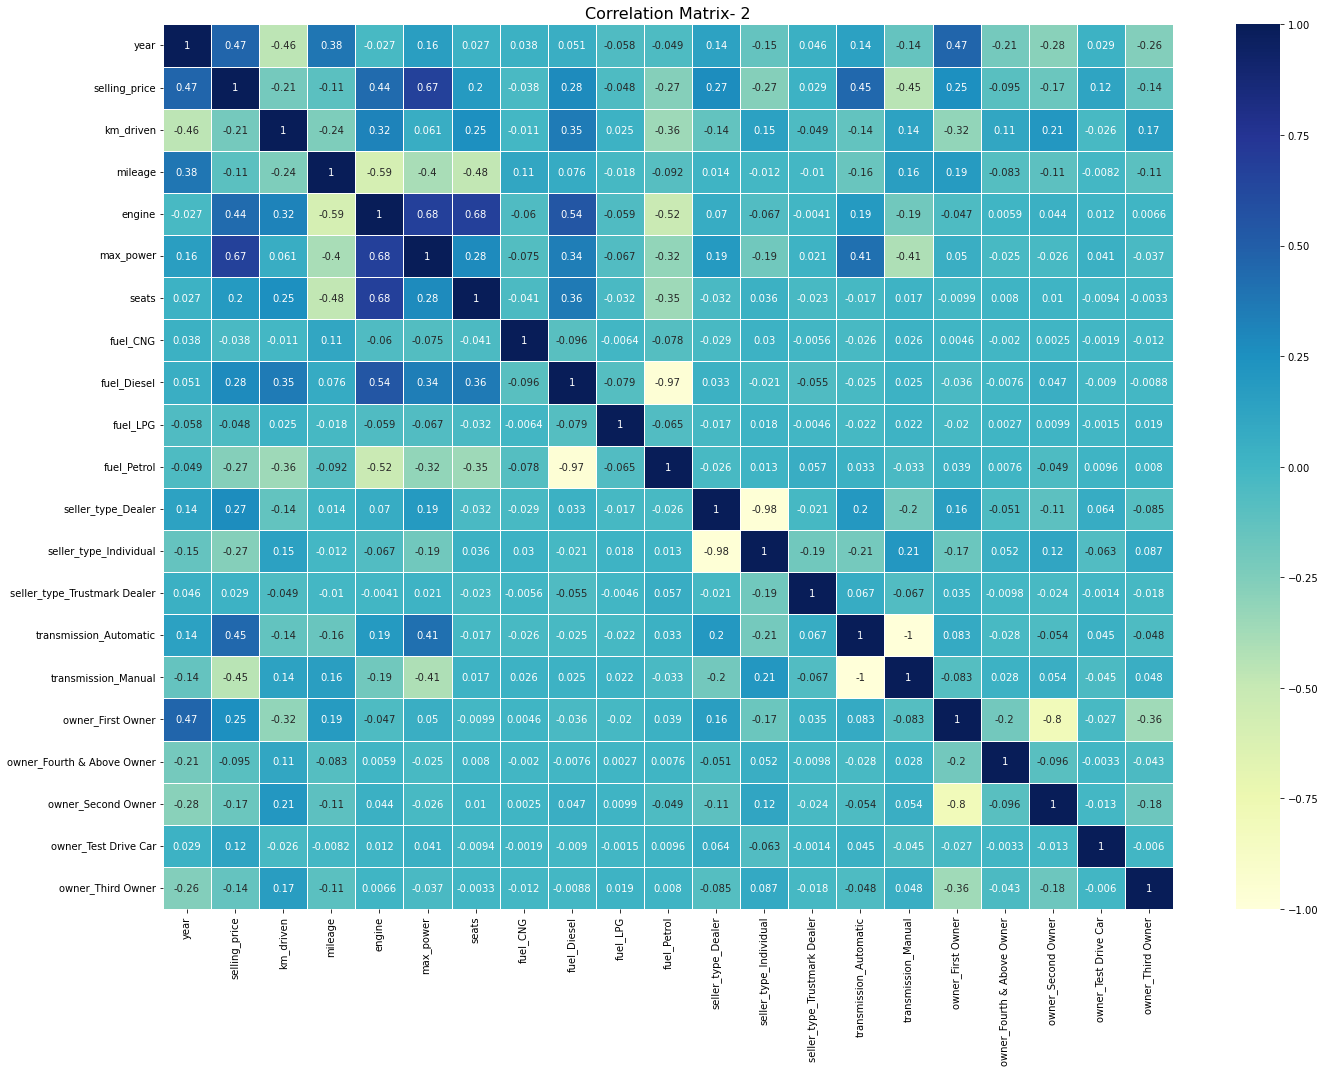

<Figure size 432x288 with 0 Axes>

In [99]:
corr = one_hot_encoded_data.corr()

fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr, cmap="YlGnBu", linewidth = 0.5, annot=True)
plt.title("Correlation Matrix- 2", fontsize=16)

save_fig('Car price prediction correlation Matrix- 2')

plt.show()
plt.tight_layout()

In [100]:
corr["selling_price"].sort_values(ascending=False)

selling_price                   1.000000
max_power                       0.670445
year                            0.466586
transmission_Automatic          0.446450
engine                          0.436963
fuel_Diesel                     0.281074
seller_type_Dealer              0.268663
owner_First Owner               0.253435
seats                           0.195299
owner_Test Drive Car            0.120128
seller_type_Trustmark Dealer    0.028753
fuel_CNG                       -0.037619
fuel_LPG                       -0.048162
owner_Fourth & Above Owner     -0.094643
mileage                        -0.107849
owner_Third Owner              -0.140758
owner_Second Owner             -0.165723
km_driven                      -0.206495
fuel_Petrol                    -0.268214
seller_type_Individual         -0.269910
transmission_Manual            -0.446450
Name: selling_price, dtype: float64

In [101]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #Using standar scaler this time!

one_hot_encoded_data[attr_num] = scaler.fit_transform(one_hot_encoded_data[attr_num])
one_hot_encoded_data

,name,year,selling_price,km_driven,mileage,engine,max_power,seats,company,fuel_CNG,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti Swift Dzire VDI,2014,-0.137899,1.548896,0.985605,-0.364913,-0.437711,-0.443831,Maruti,0,...,0,1,0,0,1,1,0,0,0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,-0.313619,1.007008,0.409700,0.151186,0.543945,-0.443831,Skoda,0,...,0,1,0,0,1,0,0,1,0,0
2,Honda City 2017-2020 EXi,2006,-0.779276,1.432018,-0.466897,0.149122,-0.304695,-0.443831,Honda,0,...,0,1,0,0,1,0,0,0,0,1
3,Hyundai i20 Sportz Diesel,2010,-0.632111,1.155762,0.883675,-0.059382,0.094352,-0.443831,Hyundai,0,...,0,1,0,0,1,1,0,0,0,0
4,Maruti Swift VXI BSIII,2007,-0.840778,1.007008,-0.874617,-0.261693,0.034495,-0.443831,Maruti,0,...,0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6665,Hyundai i20 Magna 1.4 CRDi,2014,-0.082986,0.156987,0.766455,-0.059382,0.052119,-0.443831,Hyundai,0,...,0,1,0,0,1,0,0,1,0,0
6666,Hyundai i20 Magna,2013,-0.423444,0.794503,-0.263037,-0.470198,-0.143414,-0.443831,Hyundai,0,...,0,1,0,0,1,1,0,0,0,0
6667,Hyundai Verna CRDi SX,2007,-0.829796,0.985757,-0.696240,0.140864,0.759430,-0.443831,Hyundai,0,...,0,1,0,0,1,0,1,0,0,0
6668,Maruti Swift Dzire ZDi,2009,-0.287261,1.007008,-0.059177,-0.364913,-0.441036,-0.443831,Maruti,0,...,0,1,0,0,1,1,0,0,0,0


In [102]:
corr = one_hot_encoded_data.corr()
corr["selling_price"].sort_values(ascending=False)

selling_price                   1.000000
max_power                       0.670445
year                            0.466586
transmission_Automatic          0.446450
engine                          0.436963
fuel_Diesel                     0.281074
seller_type_Dealer              0.268663
owner_First Owner               0.253435
seats                           0.195299
owner_Test Drive Car            0.120128
seller_type_Trustmark Dealer    0.028753
fuel_CNG                       -0.037619
fuel_LPG                       -0.048162
owner_Fourth & Above Owner     -0.094643
mileage                        -0.107849
owner_Third Owner              -0.140758
owner_Second Owner             -0.165723
km_driven                      -0.206495
fuel_Petrol                    -0.268214
seller_type_Individual         -0.269910
transmission_Manual            -0.446450
Name: selling_price, dtype: float64

In [103]:
indepent_var = ['year', 'km_driven', 'mileage', 'engine',
       'max_power', 'seats', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG',
       'seller_type_Dealer', 'seller_type_Trustmark Dealer',
       'transmission_Automatic', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Third Owner']

X = one_hot_encoded_data[indepent_var]
y = one_hot_encoded_data["selling_price"]

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 52)

In [105]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)

print("Accuracy on Traing set: ", linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ", linear_reg.score(X_test,y_test))

Accuracy on Traing set:  0.6356803930062693
Accuracy on Testing set:  0.653328041161366


In [106]:
X_train = sm.add_constant(X_train)

lm = sm.OLS(y_train, X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     580.1
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                        11:19:53   Log-Likelihood:                -4801.6
No. Observations:                5336   AIC:                             9637.
Df Residuals:                    5319   BIC:                             9749.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [107]:
vif_info = pd.DataFrame()
vif_info["VIF"] = [smo.variance_inflation_factor(X[indepent_var].values, ix) for ix in range(X.shape[1])]
vif_info["Columns"] = X.columns
vif_info

,VIF,Columns
0,2226.060692,year
1,1.463617,km_driven
2,2.791363,mileage
3,5.551435,engine
4,2.454375,max_power
5,2.191094,seats
6,1.053246,fuel_CNG
7,5.580628,fuel_Diesel
8,1.017534,fuel_LPG
9,1.221422,seller_type_Dealer


In [108]:
indepent_var = ['km_driven', 'mileage', 'engine',
       'max_power', 'seats', 'fuel_Diesel',
       'seller_type_Dealer',
       'transmission_Automatic']

X = one_hot_encoded_data[indepent_var]
y = one_hot_encoded_data["selling_price"]

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)

print("Accuracy on Traing set:  ",linear_reg.score(X_train, y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test, y_test))

Accuracy on Traing set:   0.5836766006085661
Accuracy on Testing set:  0.5966531678811873


In [110]:
lm = sm.OLS(y_train, X_train).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:          selling_price   R-squared (uncentered):                   0.576
Model:                            OLS   Adj. R-squared (uncentered):              0.576
Method:                 Least Squares   F-statistic:                              906.2
Date:                Mon, 19 Dec 2022   Prob (F-statistic):                        0.00
Time:                        11:19:53   Log-Likelihood:                         -5351.9
No. Observations:                5336   AIC:                                  1.072e+04
Df Residuals:                    5328   BIC:                                  1.077e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

<AxesSubplot:xlabel='selling_price', ylabel='Density'>

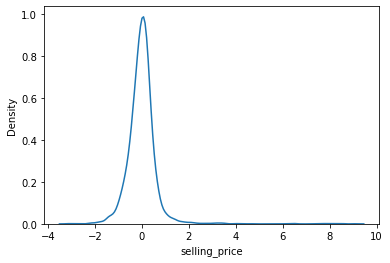

In [111]:
y_pred = linear_reg.predict(X_train)
sns.kdeplot((y_train - y_pred))

In [112]:
indepent_var = ['km_driven', 'max_power', 'fuel_Diesel',
       'seller_type_Dealer', 'transmission_Automatic']

X = one_hot_encoded_data[indepent_var]
y = one_hot_encoded_data["selling_price"]

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 2132)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

print("Accuracy on Traing set:  ",linear_reg.score(X_train, y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test, y_test))

Accuracy on Traing set:   0.5753778476125024
Accuracy on Testing set:  0.554120545663904


In [114]:
X_train = sm.add_constant(X_train)

lm = sm.OLS(y_train, X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     1444.
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                        11:19:53   Log-Likelihood:                -5291.9
No. Observations:                5336   AIC:                         1.060e+04
Df Residuals:                    5330   BIC:                         1.064e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [115]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

indepent_var = ['km_driven', 'max_power', 'fuel_Diesel',
       'seller_type_Dealer', 'transmission_Automatic']

X = one_hot_encoded_data[indepent_var]
y = one_hot_encoded_data["selling_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 2132)

lm = sm.OLS(y_train, X_train).fit()

y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

print("Train MAE:  ", mean_absolute_error(y_train, y_train_pred))
print("Train RMSE: ", np.sqrt(mean_absolute_error(y_train, y_train_pred)), '\n')

print("Test MAE:   ", mean_absolute_error(y_test, y_test_pred))
print("Test RMSE:  ", np.sqrt(mean_absolute_error(y_test, y_test_pred)))

Train MAE:   0.4204538338667191
Train RMSE:  0.6484241157350018 

Test MAE:    0.4366808487281159
Test RMSE:   0.6608183174883365


In [116]:
from sklearn.linear_model import Ridge

# Using Ridge regression to improve our accuracy!

lr = Ridge(alpha=0.001)

indepent_var = ['year', 'km_driven', 'mileage', 'engine',
       'max_power', 'seats', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG',
       'seller_type_Dealer', 'seller_type_Trustmark Dealer',
       'transmission_Automatic', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Third Owner']

X = one_hot_encoded_data[indepent_var]
y = one_hot_encoded_data["selling_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 2132)

lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [117]:
print("-----------Ridge-----------")
print("Train MAE:    ", mean_absolute_error(y_train, y_train_pred))
print("Train RMSE:   ", np.sqrt(mean_absolute_error(y_train, y_train_pred)))

print("Test MAE:     ", mean_absolute_error(y_test, y_test_pred))
print("Test RMSE:    ", np.sqrt(mean_absolute_error(y_test, y_test_pred)))

print("\nRidge co-eff: ", lr.coef_)

-----------Ridge-----------
Train MAE:     0.3414554188734116
Train RMSE:    0.5843418681503249
Test MAE:      0.3543623449522238
Test RMSE:     0.595283415653606

Ridge co-eff:  [ 0.07196522 -0.12507216 -0.0234349   0.06608283  0.44191638 -0.0062302
  0.10430374  0.276384    0.27391453  0.2402174  -0.01023961  0.65392998
 -3.63463468 -3.729999   -3.7336606  -3.72224959]


In [118]:
# No significant accuracy increase!

In [119]:
from sklearn.model_selection import RandomizedSearchCV

In [120]:
from sklearn.linear_model import Lasso
# Using Lasso regression to improve our accuracy!

lr = Lasso(alpha=0.001)

lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [121]:
print("-----------Lasso-----------")
print("Train MAE:  ", mean_absolute_error(y_train, y_train_pred))
print("Train RMSE: ", np.sqrt(mean_absolute_error(y_train, y_train_pred)))

print("Test MAE:   ", mean_absolute_error(y_test, y_test_pred))
print("Test RMSE:  ", np.sqrt(mean_absolute_error(y_test, y_test_pred)))

print("\nLasso co-eff: ", lr.coef_)

-----------Lasso-----------
Train MAE:   0.3421765621597634
Train RMSE:  0.5849585986715328
Test MAE:    0.3541745177139357
Test RMSE:   0.5951256318744268

Lasso co-eff:  [ 0.07315582 -0.12354116 -0.01530178  0.07000975  0.44661629 -0.00348994
  0.          0.25341892  0.08932491  0.25038661 -0.          0.64798963
  0.         -0.03070646 -0.08653632 -0.0610363 ]


In [122]:
# No significant accuracy increase either!

In [123]:
# Lasso regression with Randomized Saerch!

ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 2132)

ls_rs.fit(X_train, y_train)

y_train_pred = ls_rs.predict(X_train)
y_test_pred = ls_rs.predict(X_test)

print("-----------Lasso-----------")
print("Train MAE:  ", mean_absolute_error(y_train, y_train_pred))
print("Train RMSE: ", np.sqrt(mean_absolute_error(y_train, y_train_pred)))

print("Test MAE:   ", mean_absolute_error(y_test, y_test_pred))
print("Test RMSE:  ", np.sqrt(mean_absolute_error(y_test, y_test_pred)))

print("\nLasso co-eff: ", lr.coef_)

-----------Lasso-----------
Train MAE:   0.3421765621597634
Train RMSE:  0.5849585986715328
Test MAE:    0.3541745177139357
Test RMSE:   0.5951256318744268

Lasso co-eff:  [ 0.07315582 -0.12354116 -0.01530178  0.07000975  0.44661629 -0.00348994
  0.          0.25341892  0.08932491  0.25038661 -0.          0.64798963
  0.         -0.03070646 -0.08653632 -0.0610363 ]


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

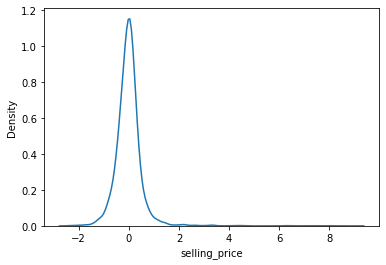

In [124]:
sns.kdeplot((y_train - y_train_pred))

In [125]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()

indepent_var = ['year', 'km_driven', 'mileage', 'engine',
       'max_power', 'seats', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG',
       'seller_type_Dealer', 'seller_type_Trustmark Dealer',
       'transmission_Automatic', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Third Owner']

X = one_hot_encoded_data[indepent_var]
y = one_hot_encoded_data["selling_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

rf_reg.fit(X_train, y_train)
y_pred= rf_reg.predict(X_test)

print("Accuracy on Traing set:  ",rf_reg.score(X_train, y_train))
print("Accuracy on Testing set: ",rf_reg.score(X_test, y_test))

Accuracy on Traing set:   0.9857310605047523
Accuracy on Testing set:  0.8810933733358634


In [126]:
# Seems like Linear Regression models perform not-so-well with our datset!
# Random Forest has given us an accuracy >95% on the dataset, while >86% on the test set!
# This may point to a overfitting of the data by the RF model!
# We can move further with this model, rather than working with OLS method!

# SO, it seems like regression models can predict the prices of the car models with an accuracy of ~55-60%

In [127]:
# One last model to plot a regression line!
indepent_var = ['km_driven', 'max_power', 'fuel_Diesel',
       'seller_type_Dealer', 'transmission_Automatic']

X = one_hot_encoded_data[indepent_var]
y = one_hot_encoded_data["selling_price"]

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 32)

In [129]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

print("Accuracy on Traing set: ", linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ", linear_reg.score(X_test,y_test))

Accuracy on Traing set:  0.5690630877448358
Accuracy on Testing set:  0.5782933844467597


In [130]:
X_train = sm.add_constant(X_train)

lm = sm.OLS(y_train, X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     1408.
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                        11:19:56   Log-Likelihood:                -5270.7
No. Observations:                5336   AIC:                         1.055e+04
Df Residuals:                    5330   BIC:                         1.059e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [131]:
# Not much of change in R^2 values! But notice how the F-statistic is around 1400, which is significantly more than most of our previous models!
# This means that our model has fitted the data very well! and also notice how none of the p-values are high!

Figure saved


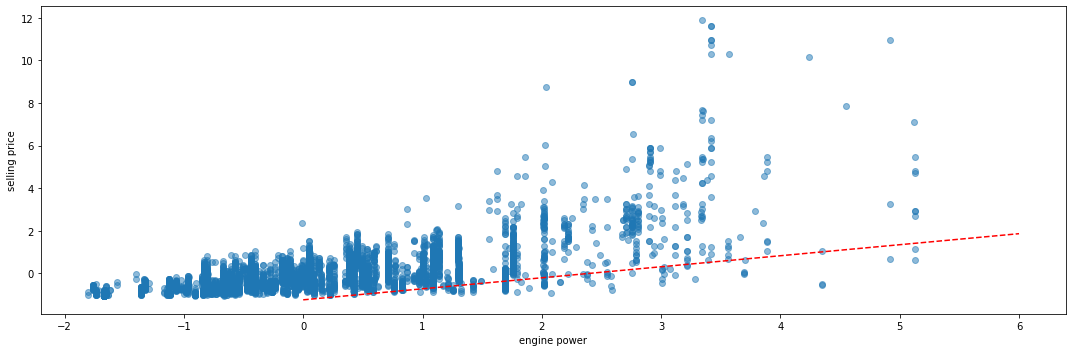

In [132]:
x = one_hot_encoded_data['max_power']
y = one_hot_encoded_data['selling_price']

fig, ax = plt.subplots(figsize=(15, 5))

plt.scatter(x, y, alpha=0.5)
ax.set_xlabel('engine power')
ax.set_ylabel('selling price')
 
max_x = one_hot_encoded_data['max_power'].max()
min_x = one_hot_encoded_data['max_power'].min()

x = np.arange(min_x, max_x, 1)
y = (0.5177 * x) - 0.3040      #Using intercept and constant from the OLS summary
 
save_fig('Selling price vs max power(scaled) regression line') 

plt.plot(y, 'r--')
plt.show()

Figure saved


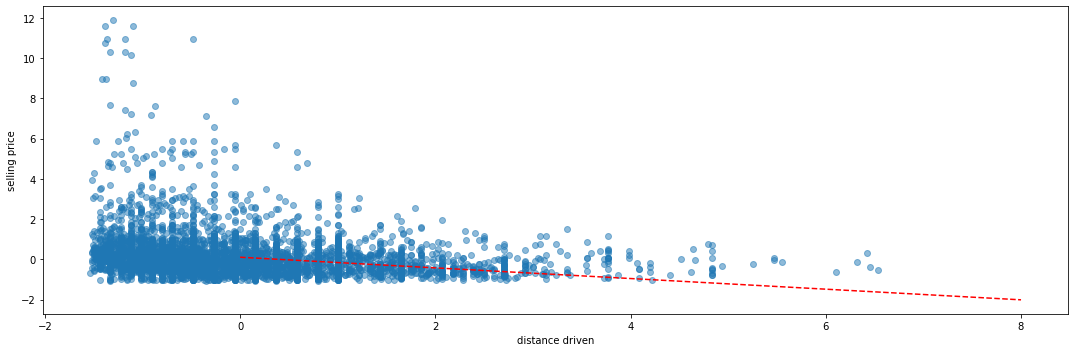

In [133]:
x = one_hot_encoded_data['km_driven']
y = one_hot_encoded_data['selling_price']

fig, ax = plt.subplots(figsize=(15, 5))

plt.scatter(x, y, alpha=0.5)
ax.set_xlabel('distance driven')
ax.set_ylabel('selling price')

max_x = one_hot_encoded_data['km_driven'].max()
min_x = one_hot_encoded_data['km_driven'].min()
 
x = np.arange(min_x, max_x, 1)
y = (-0.2648 * x) - 0.3040   #Using intercept and constant from the OLS summary
 
save_fig('Selling price vs distance driven(scaled) regression line') 
    
plt.plot(y, 'r--')
plt.show()